In [2]:
library("ggplot2")
library("dplyr")
library("dummies")
library("modelr")
library("CatEncoders")
library("Matrix")
library("Metrics")
set.seed(111)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

dummies-1.5.6 provided by Decision Patterns

Warning message:
"package 'CatEncoders' was built under R version 3.6.3"
Attaching package: 'CatEncoders'

The following object is masked from 'package:base':

    transform

Warning message:
"package 'Metrics' was built under R version 3.6.3"
Attaching package: 'Metrics'

The following objects are masked from 'package:modelr':

    mae, mape, mse, rmse



#### 1: Exploratory Data Analysis

In [3]:
df = read.csv("Life expectancy data.csv")

In [4]:
df
### dfOriginal will be the original data frame
dfOriginal = df

Country,Year,Status,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,...,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness..1.19.years,thinness.5.9.years,Income.composition.of.resources,Schooling
Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,...,6,8.16,65,0.1,584.25921,33736494,17.2,17.3,0.479,10.1
Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,...,58,8.18,62,0.1,612.69651,327582,17.5,17.5,0.476,10.0
Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,...,62,8.13,64,0.1,631.74498,31731688,17.7,17.7,0.470,9.9
Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,...,67,8.52,67,0.1,669.95900,3696958,17.9,18.0,0.463,9.8
Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,...,68,7.87,68,0.1,63.53723,2978599,18.2,18.2,0.454,9.5
Afghanistan,2010,Developing,58.8,279,74,0.01,79.679367,66,1989,...,66,9.20,66,0.1,553.32894,2883167,18.4,18.4,0.448,9.2
Afghanistan,2009,Developing,58.6,281,77,0.01,56.762217,63,2861,...,63,9.42,63,0.1,445.89330,284331,18.6,18.7,0.434,8.9
Afghanistan,2008,Developing,58.1,287,80,0.03,25.873925,64,1599,...,64,8.33,64,0.1,373.36112,2729431,18.8,18.9,0.433,8.7
Afghanistan,2007,Developing,57.5,295,82,0.02,10.910156,63,1141,...,63,6.73,63,0.1,369.83580,26616792,19.0,19.1,0.415,8.4
Afghanistan,2006,Developing,57.3,295,84,0.03,17.171518,64,1990,...,58,7.43,58,0.1,272.56377,2589345,19.2,19.3,0.405,8.1


In [4]:
length(names(df))
colSums(is.na(df))
### Data with 22 variables

[1] 22

Country                            Year 
                              0                               0 
                         Status                 Life.expectancy 
                              0                              10 
                Adult.Mortality                   infant.deaths 
                             10                               0 
                        Alcohol          percentage.expenditure 
                            194                               0 
                    Hepatitis.B                         Measles 
                            553                               0 
                            BMI               under.five.deaths 
                             34                               0 
                          Polio               Total.expenditure 
                             19                             226 
                     Diphtheria                        HIV.AIDS 
                             19                               0 
                            GDP                      Population 
                            448                             652 
           thinness..1.19.years              thinness.5.9.years 
                             34                              34 
Income.composition.of.resources                       Schooling 
                            167                             163

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
"Removed 10 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 10 rows containing missing values (geom_point)."`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
"Removed 10 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 10 rows containing missing values (geom_point)."

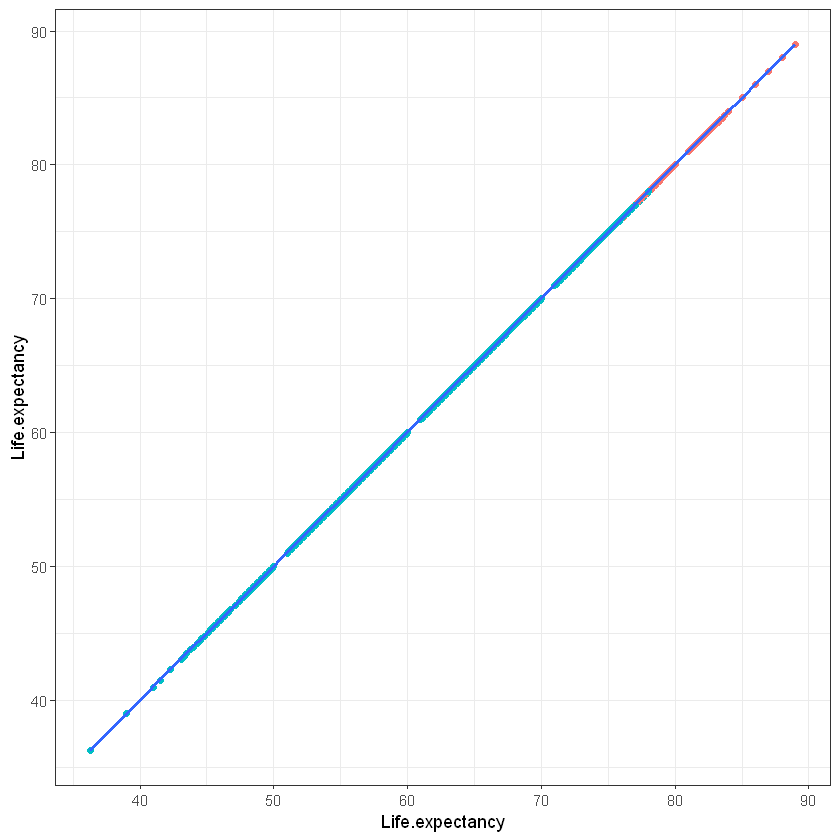

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
"Removed 10 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 10 rows containing missing values (geom_point)."

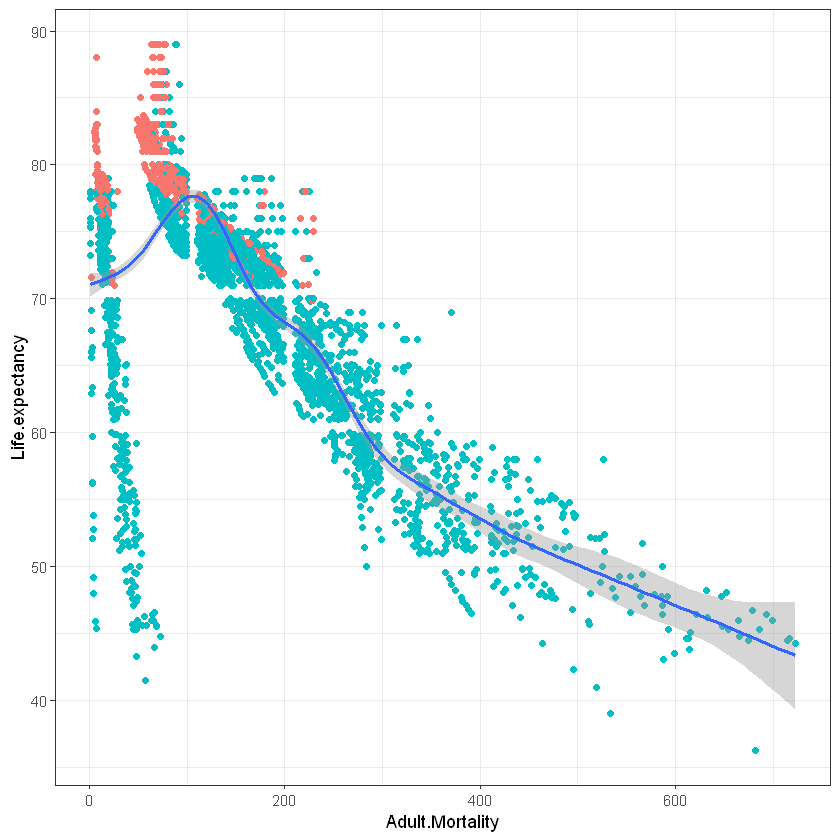

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
"Removed 203 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 203 rows containing missing values (geom_point)."

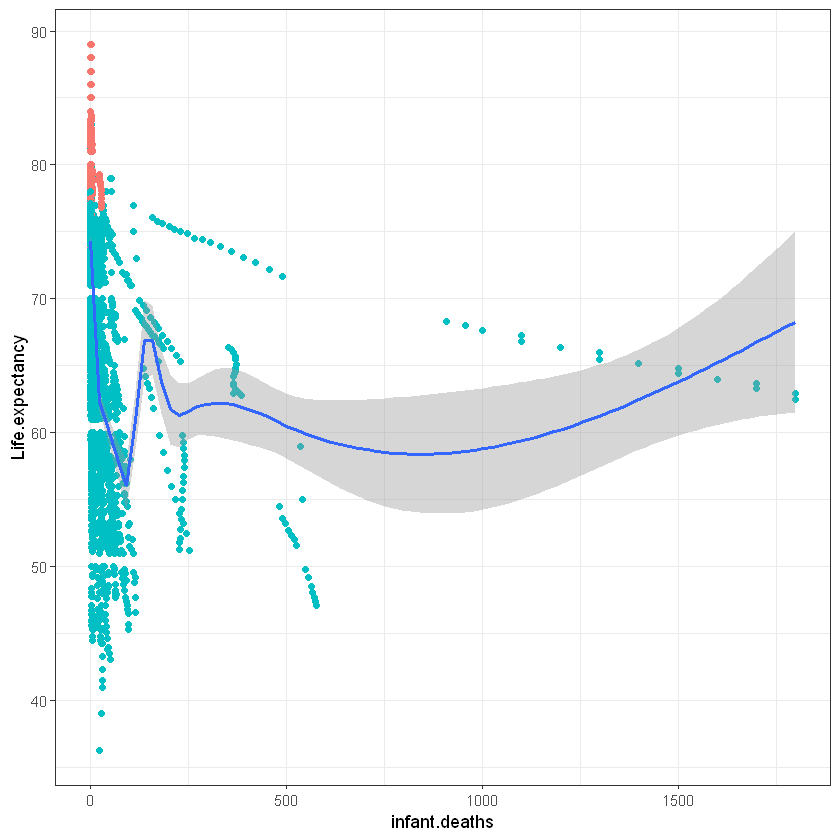

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
"Removed 10 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 10 rows containing missing values (geom_point)."

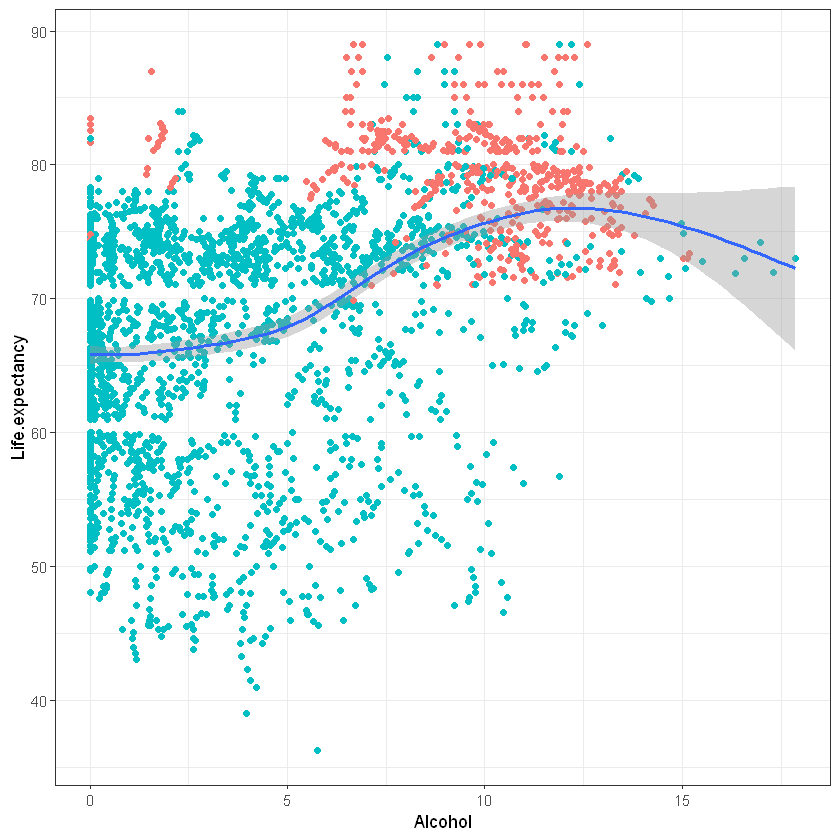

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
"Removed 563 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 563 rows containing missing values (geom_point)."

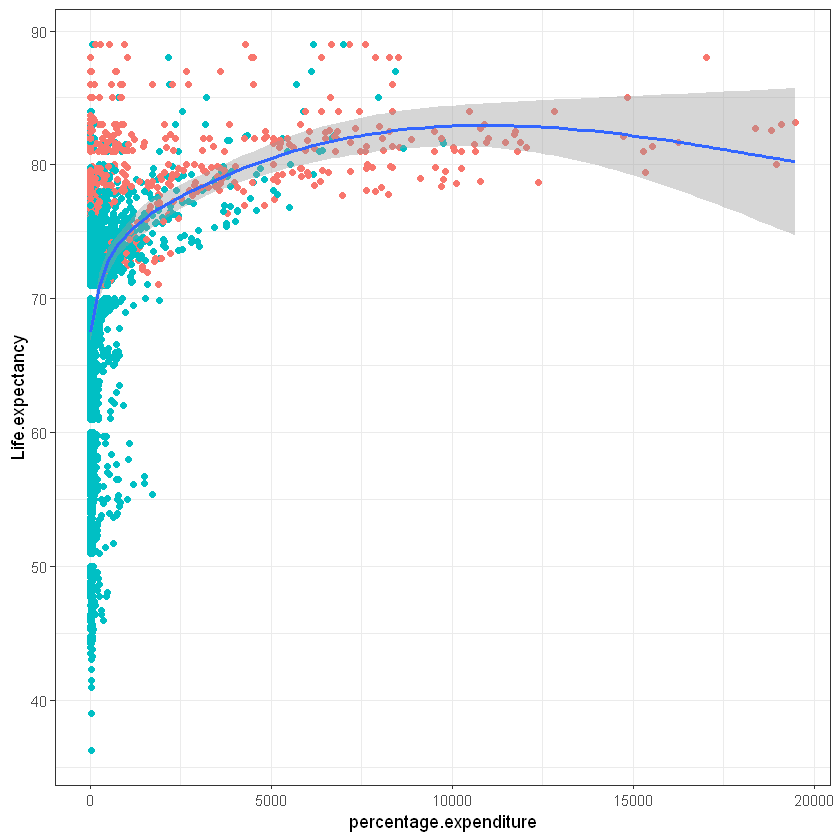

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
"Removed 10 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 10 rows containing missing values (geom_point)."

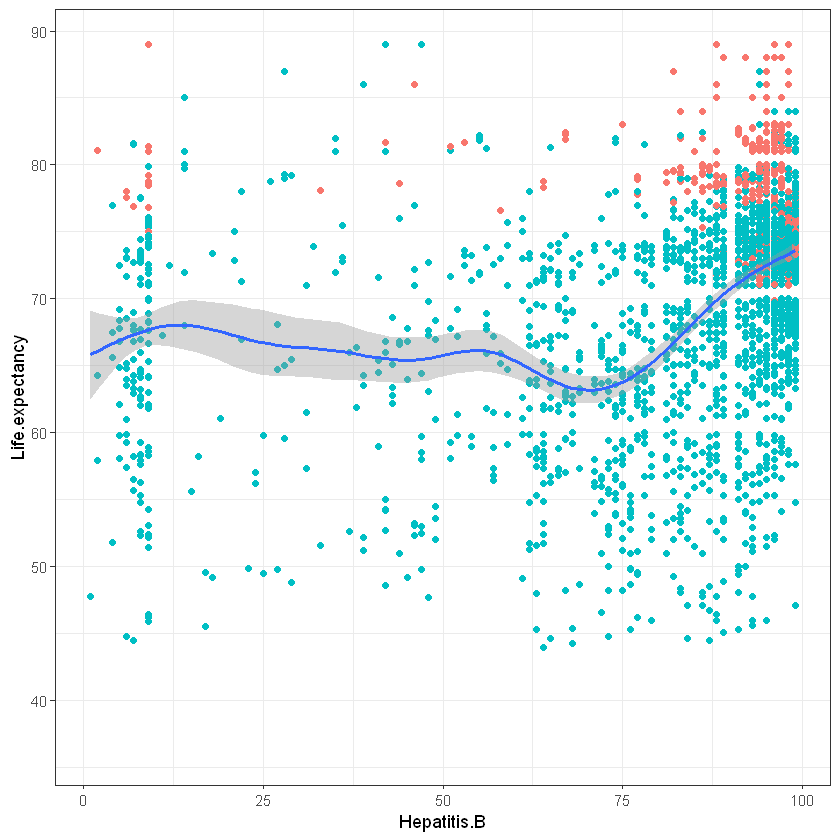

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
"Removed 42 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 42 rows containing missing values (geom_point)."

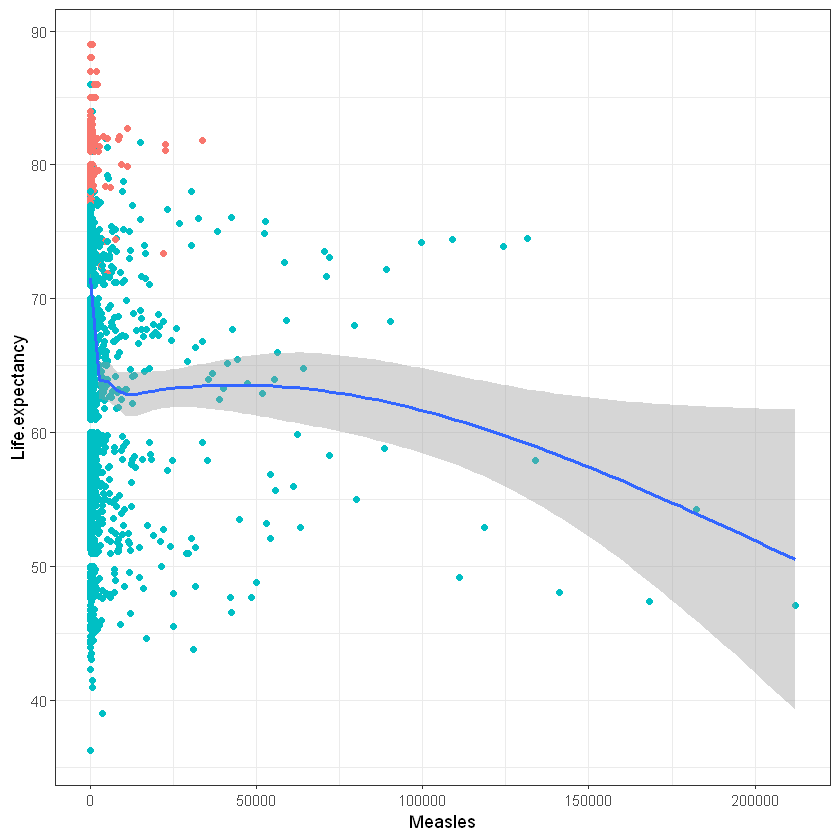

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
"Removed 10 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 10 rows containing missing values (geom_point)."

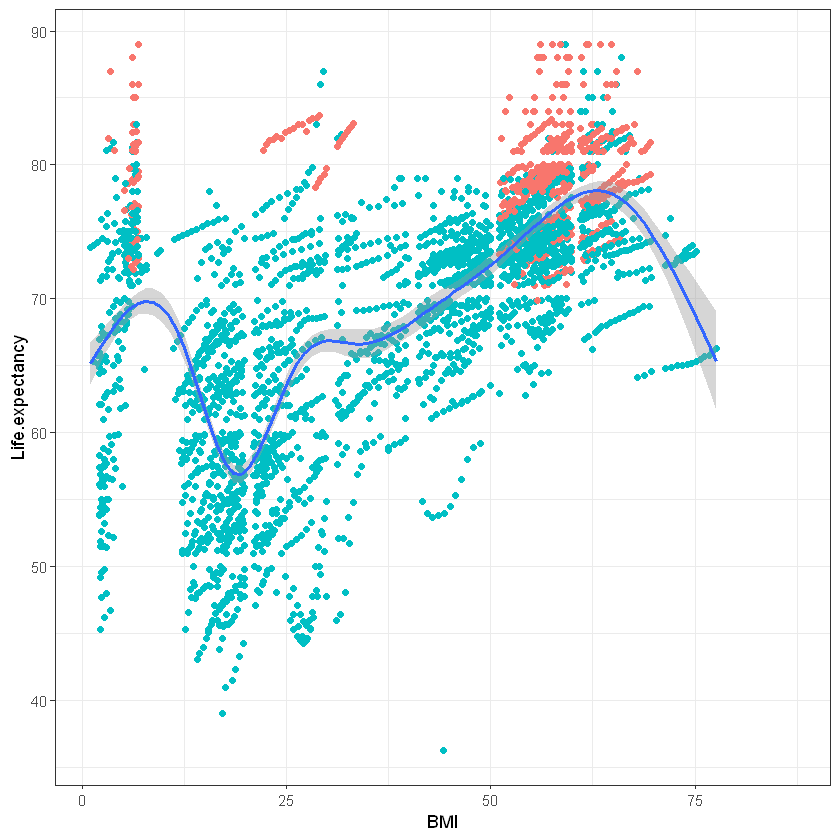

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
"Removed 29 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 29 rows containing missing values (geom_point)."

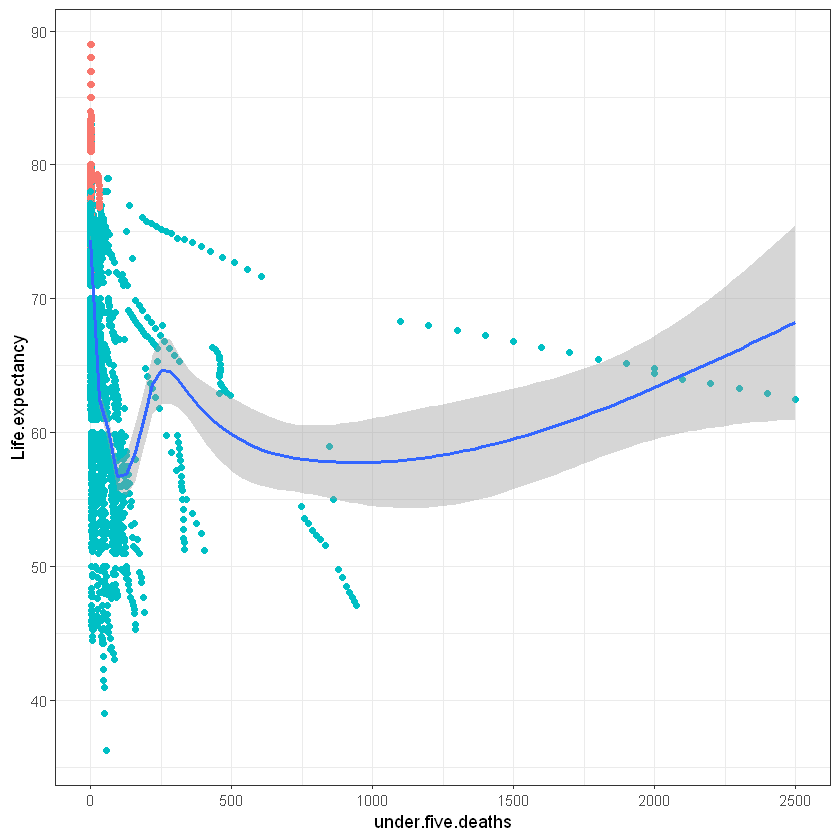

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
"Removed 236 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 236 rows containing missing values (geom_point)."

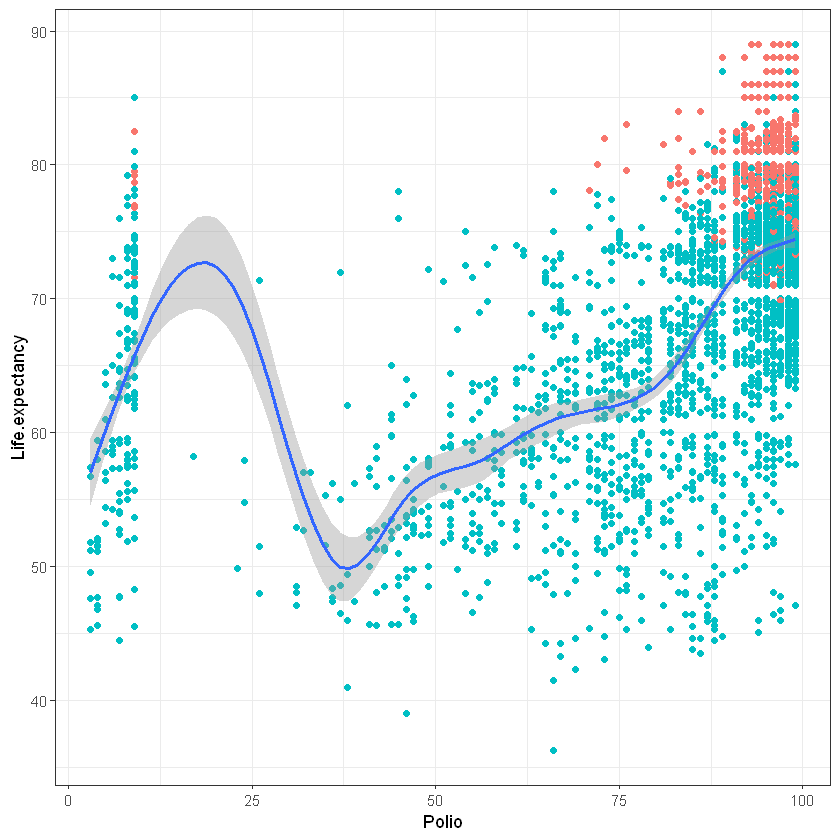

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
"Removed 29 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 29 rows containing missing values (geom_point)."

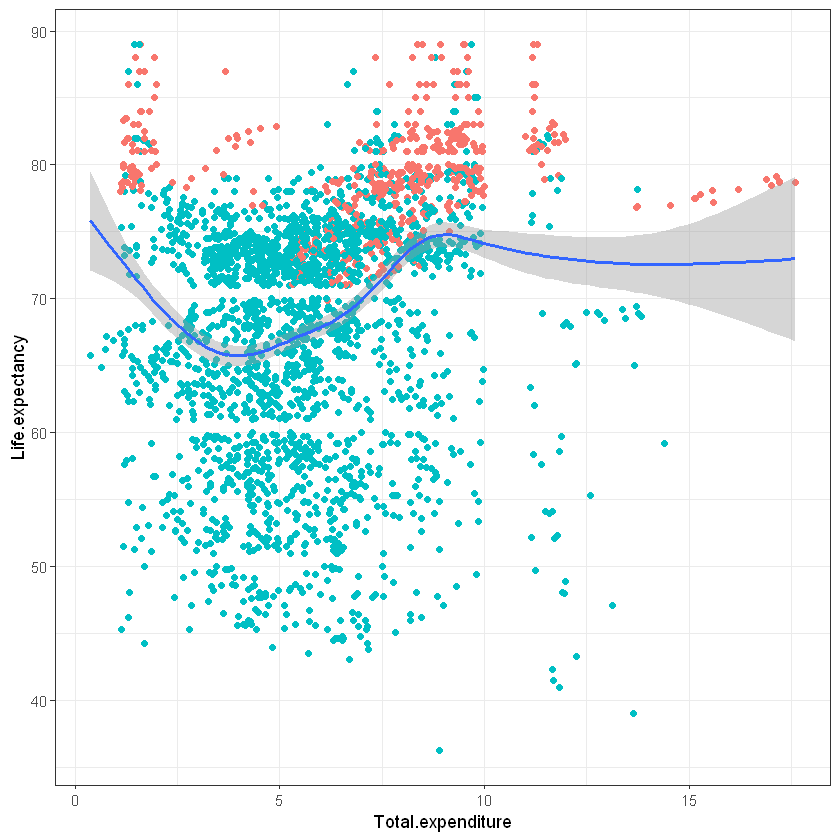

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
"Removed 10 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 10 rows containing missing values (geom_point)."

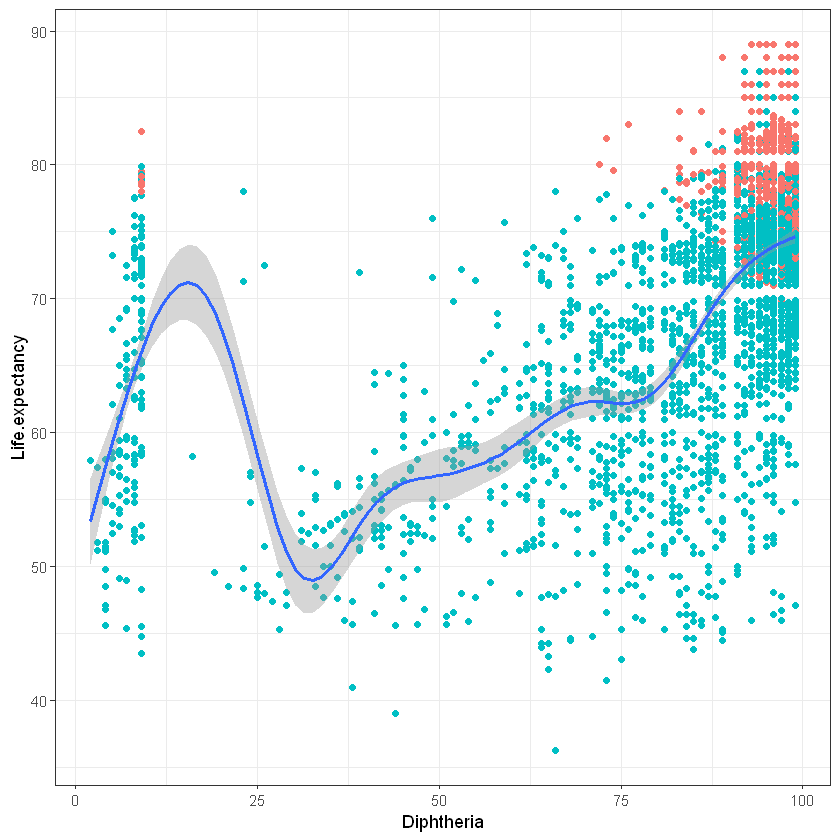

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
"Removed 453 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 453 rows containing missing values (geom_point)."

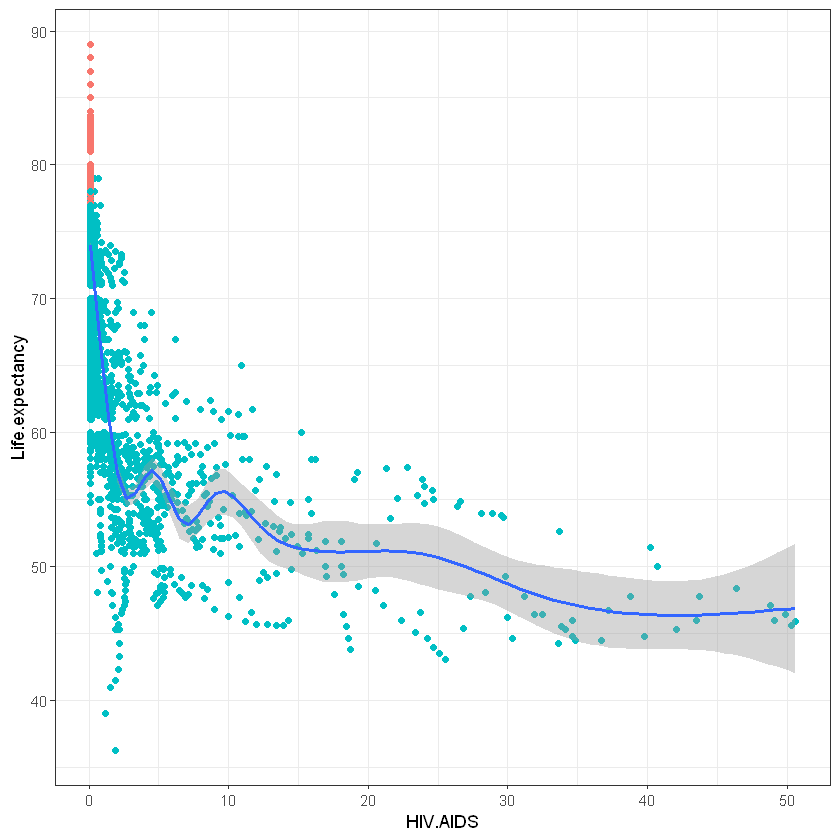

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
"Removed 654 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 654 rows containing missing values (geom_point)."

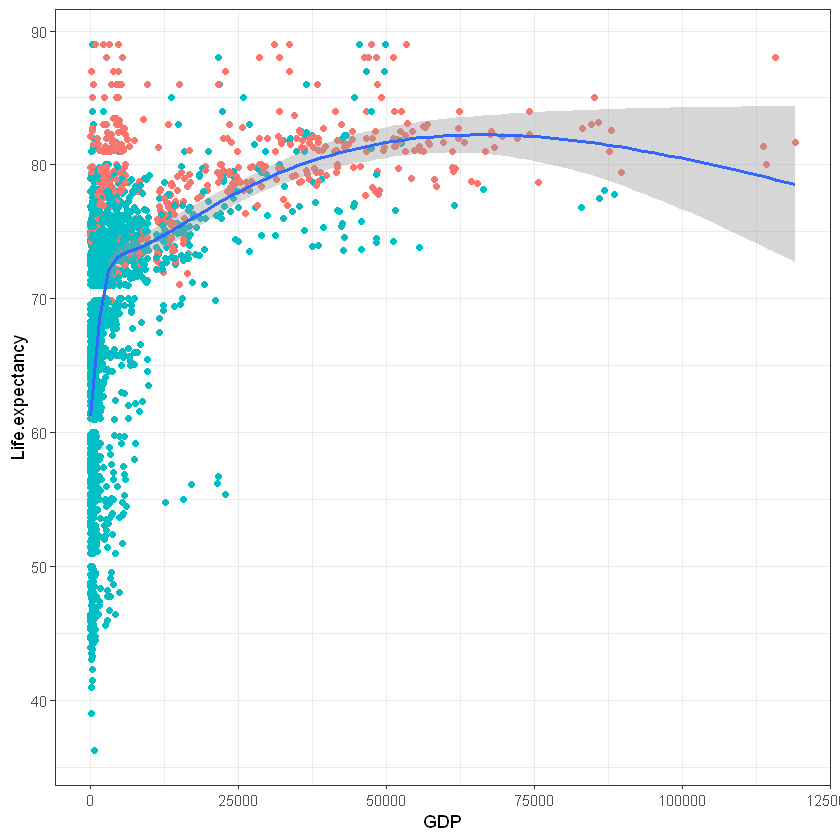

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
"Removed 42 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 42 rows containing missing values (geom_point)."

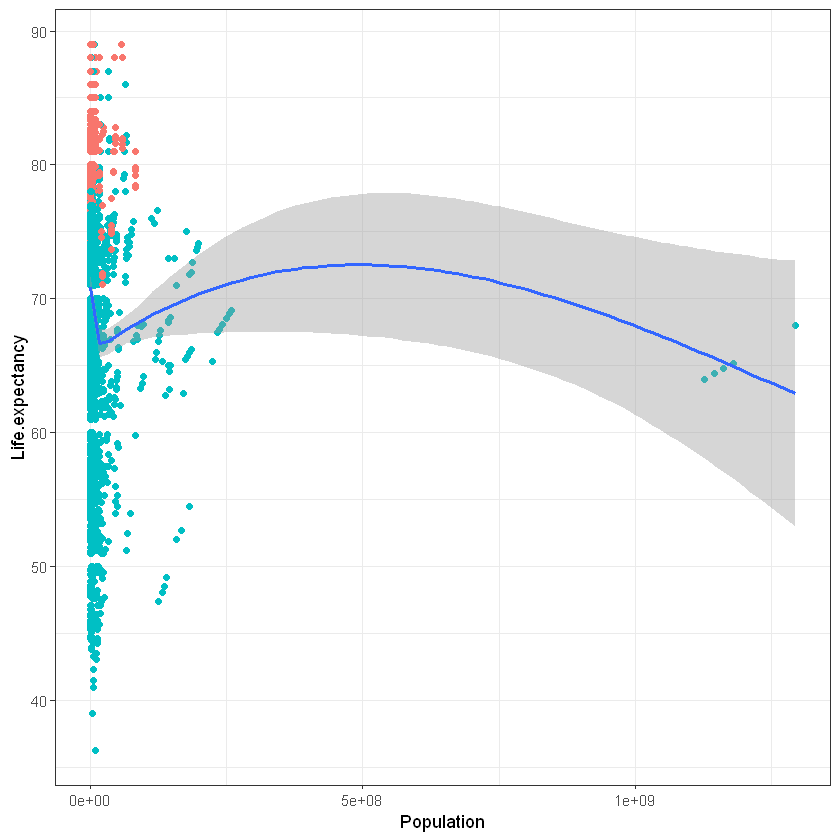

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
"Removed 42 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 42 rows containing missing values (geom_point)."

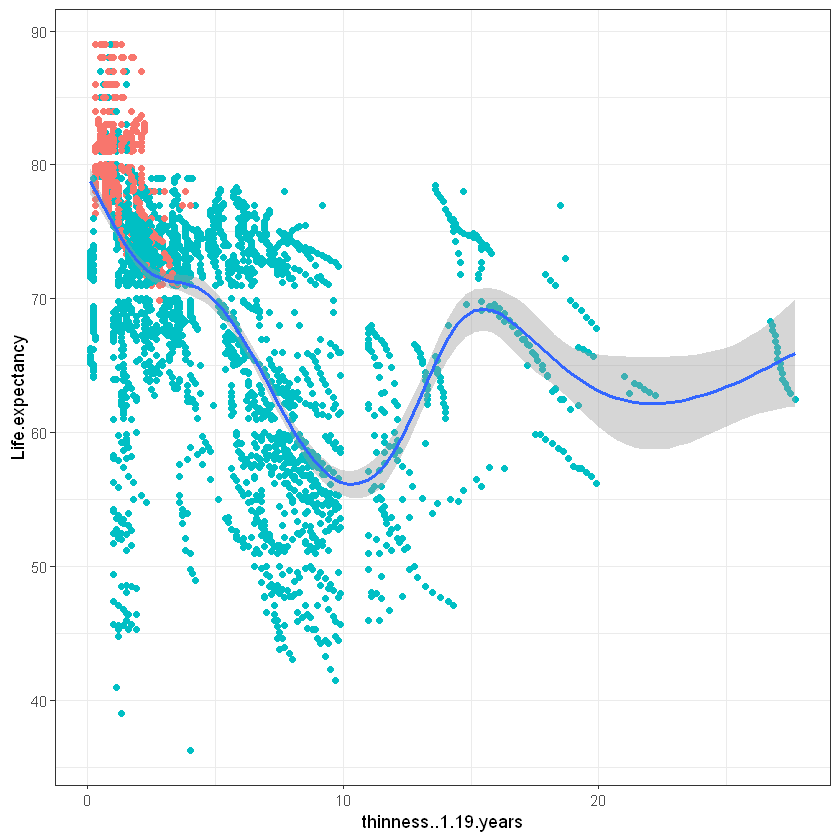

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
"Removed 170 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 170 rows containing missing values (geom_point)."

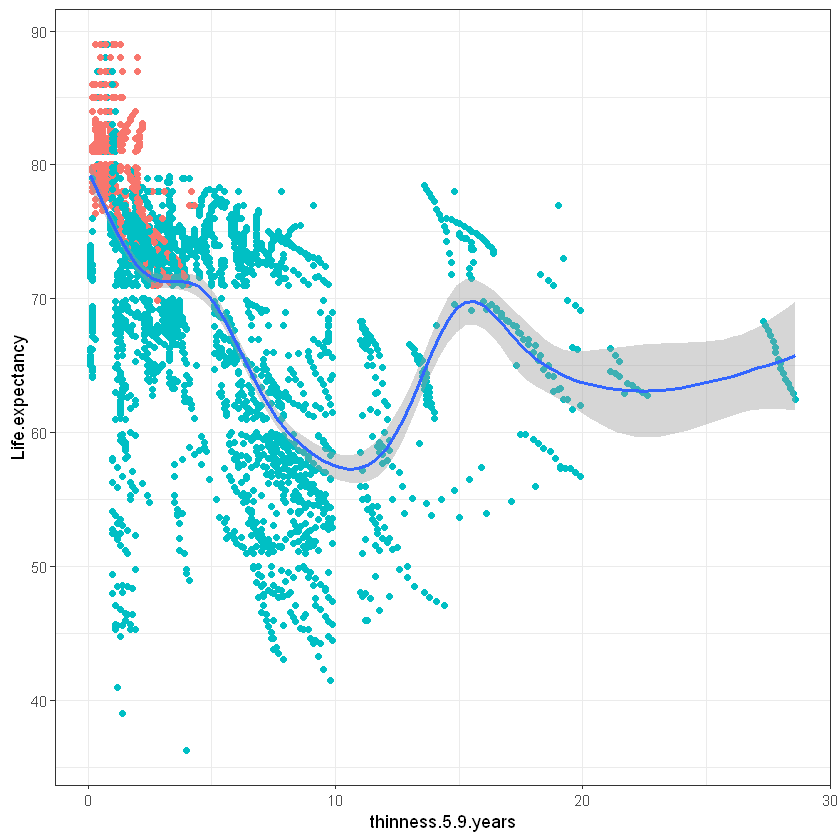

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
"Removed 170 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 170 rows containing missing values (geom_point)."

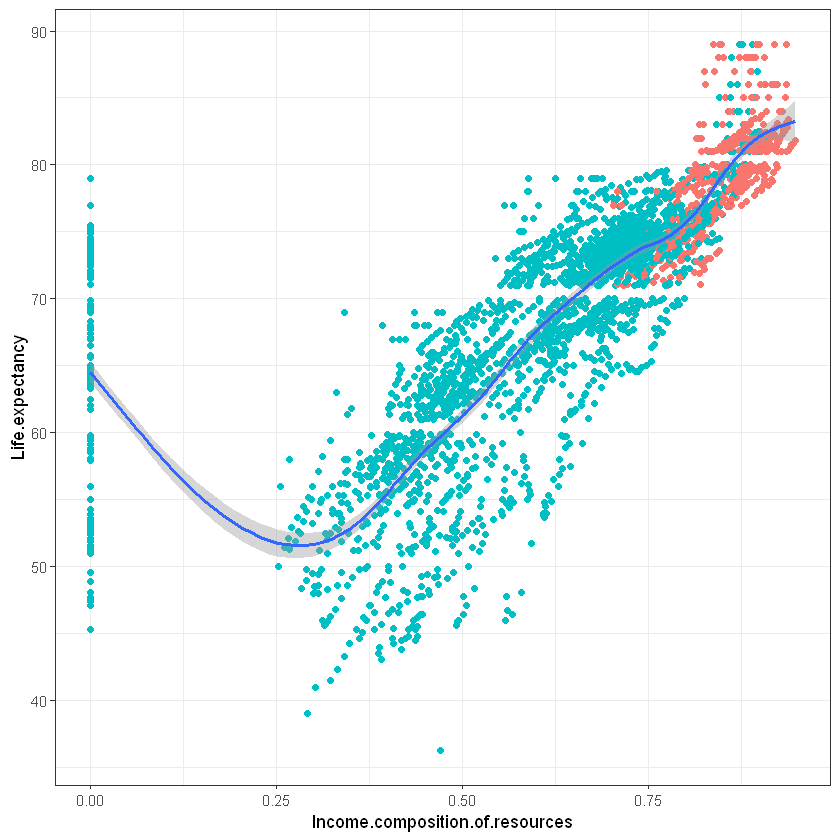

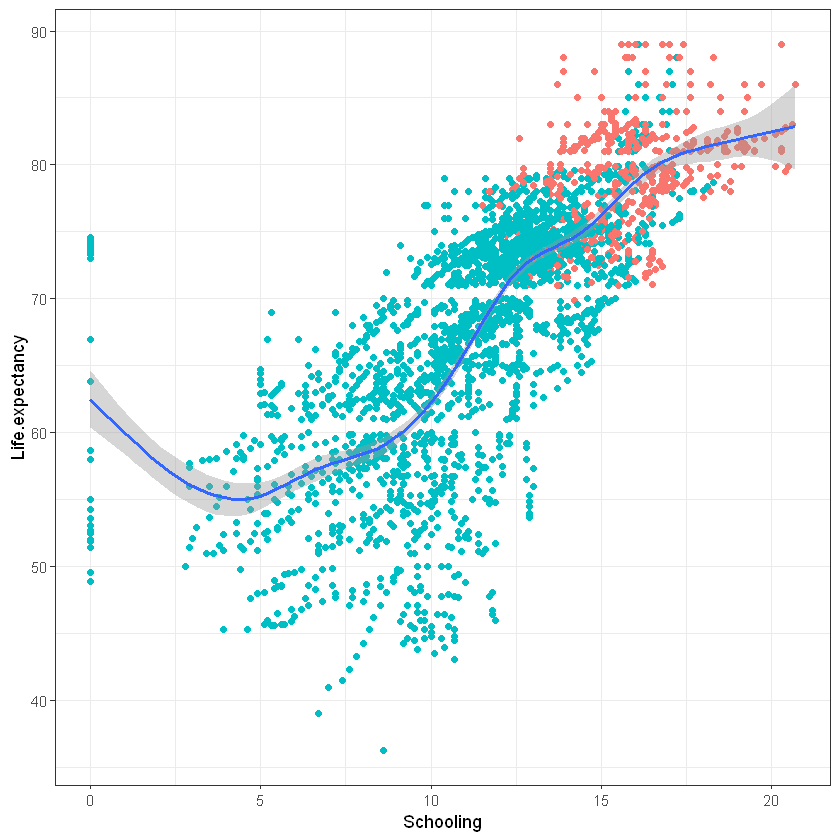

In [5]:
### Lets do some exploratory data analysis 

for (X in 4:(ncol(df))){

    print(ggplot(data = df)+ 
            geom_point(mapping = aes(x = df[,X], y = Life.expectancy, color = Status))+
            xlab(colnames(df[X]))+
            geom_smooth(mapping = aes(x = df[,X], y = Life.expectancy))+
            theme_bw()+
            theme(legend.position = "none")
            )
    

    
    }



### I will keep all the variables for now and remove/feature engineer more later.

### Additionally, many of these variables are correlated with the country's Status, which is important because a country's Status is one of the most influential factors in determining life expectancy.

### For now, I will keep all the variables in our model and deal with the issue of multicollinearity when we have an initial model.


Warning message:
"Removed 1 rows containing missing values (geom_bar)."

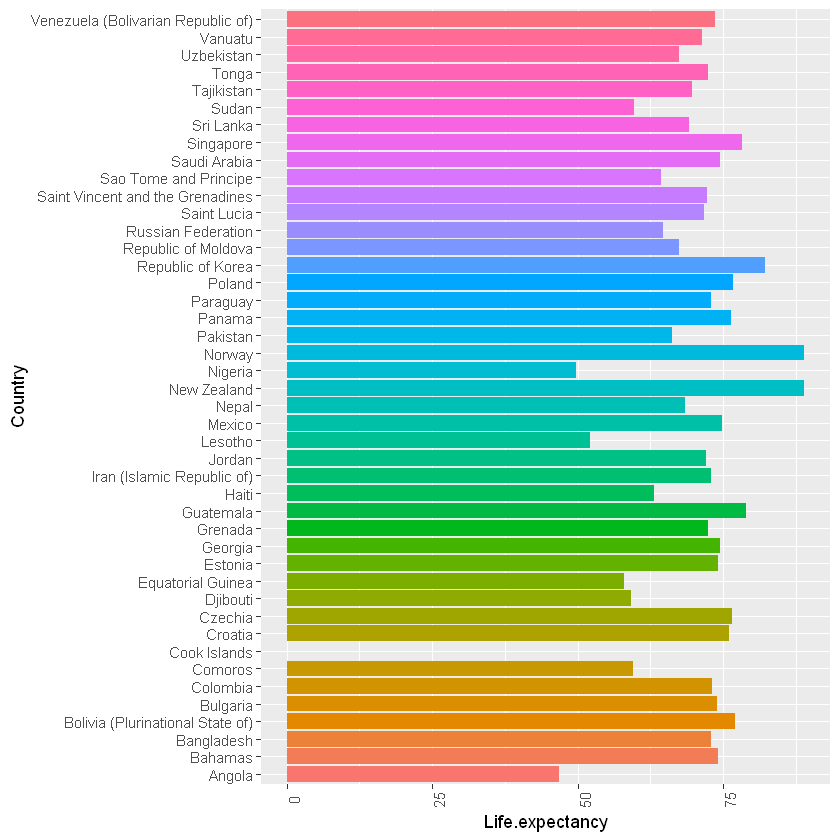

In [5]:
### Sample 50 random observations and look at the life expectancies
dfVisualizationSampling = sample_n(dfOriginal,50)
print(ggplot(data = dfVisualizationSampling,aes(x = Country, y = Life.expectancy,fill = Country))+ 
            geom_bar(stat = "identity",position = "dodge")+
            theme(legend.position = "none")+
            theme(axis.text.x = element_text(angle = 90))+
            coord_flip()
            )
    

### The graph above shows the life expectancy based by country. Some countries have a higher life expectancy range than others. 

### It makes sense as the data does not include environmental conditions, access to healthcare and/or medicine, or diet. An observation's country can tell us a lot about its culture.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
"Removed 10 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 10 rows containing missing values (geom_point)."

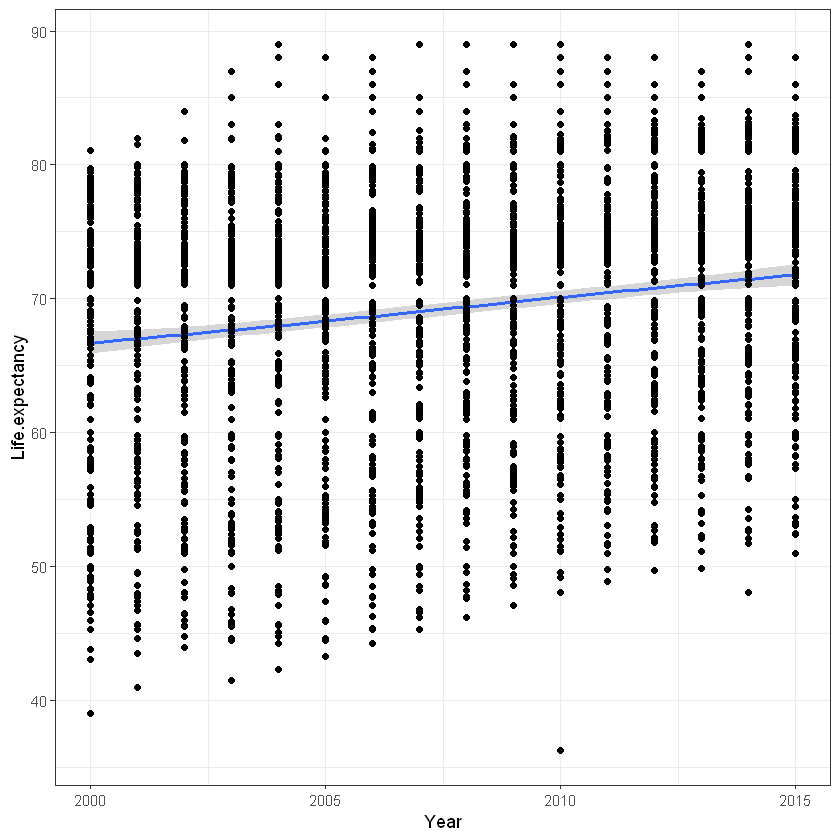

In [7]:
print(ggplot(data = df)+ 
            geom_smooth(mapping = aes(x = Year,y = Life.expectancy))+
            geom_point(mapping = aes(x = Year,y = Life.expectancy))+
            theme_bw()+
            theme(legend.position = "none")
            )

### Year also has an influence on life expectancy, causing it to increase as time goes on. From 2000, the minimum life expectancy is maybe around 38 years. By 2015, the minimum life expectancy is around 51 or 52.

#### 2: Data Cleaning and Feature Engineering

In [8]:
df

Country,Year,Status,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,...,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness..1.19.years,thinness.5.9.years,Income.composition.of.resources,Schooling
Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,...,6,8.16,65,0.1,584.25921,33736494,17.2,17.3,0.479,10.1
Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,...,58,8.18,62,0.1,612.69651,327582,17.5,17.5,0.476,10.0
Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,...,62,8.13,64,0.1,631.74498,31731688,17.7,17.7,0.470,9.9
Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,...,67,8.52,67,0.1,669.95900,3696958,17.9,18.0,0.463,9.8
Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,...,68,7.87,68,0.1,63.53723,2978599,18.2,18.2,0.454,9.5
Afghanistan,2010,Developing,58.8,279,74,0.01,79.679367,66,1989,...,66,9.20,66,0.1,553.32894,2883167,18.4,18.4,0.448,9.2
Afghanistan,2009,Developing,58.6,281,77,0.01,56.762217,63,2861,...,63,9.42,63,0.1,445.89330,284331,18.6,18.7,0.434,8.9
Afghanistan,2008,Developing,58.1,287,80,0.03,25.873925,64,1599,...,64,8.33,64,0.1,373.36112,2729431,18.8,18.9,0.433,8.7
Afghanistan,2007,Developing,57.5,295,82,0.02,10.910156,63,1141,...,63,6.73,63,0.1,369.83580,26616792,19.0,19.1,0.415,8.4
Afghanistan,2006,Developing,57.3,295,84,0.03,17.171518,64,1990,...,58,7.43,58,0.1,272.56377,2589345,19.2,19.3,0.405,8.1


In [9]:
### Encoding the countries as vectors and concatenating them onto df
encoder = as.numeric(as.factor(df$Country))
dfcat = data.frame(model.matrix(~df$Country-1,data = as.factor(df$Country)))
df = cbind(df,dfcat)

In [10]:
df

Country,Year,Status,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,...,df.CountryUnited.Republic.of.Tanzania,df.CountryUnited.States.of.America,df.CountryUruguay,df.CountryUzbekistan,df.CountryVanuatu,df.CountryVenezuela..Bolivarian.Republic.of.,df.CountryViet.Nam,df.CountryYemen,df.CountryZambia,df.CountryZimbabwe
Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,...,0,0,0,0,0,0,0,0,0,0
Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,...,0,0,0,0,0,0,0,0,0,0
Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,...,0,0,0,0,0,0,0,0,0,0
Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,...,0,0,0,0,0,0,0,0,0,0
Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,...,0,0,0,0,0,0,0,0,0,0
Afghanistan,2010,Developing,58.8,279,74,0.01,79.679367,66,1989,...,0,0,0,0,0,0,0,0,0,0
Afghanistan,2009,Developing,58.6,281,77,0.01,56.762217,63,2861,...,0,0,0,0,0,0,0,0,0,0
Afghanistan,2008,Developing,58.1,287,80,0.03,25.873925,64,1599,...,0,0,0,0,0,0,0,0,0,0
Afghanistan,2007,Developing,57.5,295,82,0.02,10.910156,63,1141,...,0,0,0,0,0,0,0,0,0,0
Afghanistan,2006,Developing,57.3,295,84,0.03,17.171518,64,1990,...,0,0,0,0,0,0,0,0,0,0


In [11]:
### Creating columns for 'Status'
df = cbind(df,dummy(df$Status,sep = FALSE))

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"

In [12]:
df['year.'] = df['Year']

In [13]:
df = df[,4:ncol(df)]

In [14]:
df

Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,BMI,under.five.deaths,Polio,...,df.CountryUzbekistan,df.CountryVanuatu,df.CountryVenezuela..Bolivarian.Republic.of.,df.CountryViet.Nam,df.CountryYemen,df.CountryZambia,df.CountryZimbabwe,NAFALSEDeveloped,NAFALSEDeveloping,year.
65.0,263,62,0.01,71.279624,65,1154,19.1,83,6,...,0,0,0,0,0,0,0,0,1,2015
59.9,271,64,0.01,73.523582,62,492,18.6,86,58,...,0,0,0,0,0,0,0,0,1,2014
59.9,268,66,0.01,73.219243,64,430,18.1,89,62,...,0,0,0,0,0,0,0,0,1,2013
59.5,272,69,0.01,78.184215,67,2787,17.6,93,67,...,0,0,0,0,0,0,0,0,1,2012
59.2,275,71,0.01,7.097109,68,3013,17.2,97,68,...,0,0,0,0,0,0,0,0,1,2011
58.8,279,74,0.01,79.679367,66,1989,16.7,102,66,...,0,0,0,0,0,0,0,0,1,2010
58.6,281,77,0.01,56.762217,63,2861,16.2,106,63,...,0,0,0,0,0,0,0,0,1,2009
58.1,287,80,0.03,25.873925,64,1599,15.7,110,64,...,0,0,0,0,0,0,0,0,1,2008
57.5,295,82,0.02,10.910156,63,1141,15.2,113,63,...,0,0,0,0,0,0,0,0,1,2007
57.3,295,84,0.03,17.171518,64,1990,14.7,116,58,...,0,0,0,0,0,0,0,0,1,2006


In [15]:
### Replacing the NA values for each column with the median:

for (i in names(df)){
    df[which(is.na(df[i])),i] = median(df[,i],na.rm = TRUE)
}
    


In [16]:
df

Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,BMI,under.five.deaths,Polio,...,df.CountryUzbekistan,df.CountryVanuatu,df.CountryVenezuela..Bolivarian.Republic.of.,df.CountryViet.Nam,df.CountryYemen,df.CountryZambia,df.CountryZimbabwe,NAFALSEDeveloped,NAFALSEDeveloping,year.
65.0,263,62,0.01,71.279624,65,1154,19.1,83,6,...,0,0,0,0,0,0,0,0,1,2015
59.9,271,64,0.01,73.523582,62,492,18.6,86,58,...,0,0,0,0,0,0,0,0,1,2014
59.9,268,66,0.01,73.219243,64,430,18.1,89,62,...,0,0,0,0,0,0,0,0,1,2013
59.5,272,69,0.01,78.184215,67,2787,17.6,93,67,...,0,0,0,0,0,0,0,0,1,2012
59.2,275,71,0.01,7.097109,68,3013,17.2,97,68,...,0,0,0,0,0,0,0,0,1,2011
58.8,279,74,0.01,79.679367,66,1989,16.7,102,66,...,0,0,0,0,0,0,0,0,1,2010
58.6,281,77,0.01,56.762217,63,2861,16.2,106,63,...,0,0,0,0,0,0,0,0,1,2009
58.1,287,80,0.03,25.873925,64,1599,15.7,110,64,...,0,0,0,0,0,0,0,0,1,2008
57.5,295,82,0.02,10.910156,63,1141,15.2,113,63,...,0,0,0,0,0,0,0,0,1,2007
57.3,295,84,0.03,17.171518,64,1990,14.7,116,58,...,0,0,0,0,0,0,0,0,1,2006


In [17]:
### Split the dataset into a train and test

indicies = sample(nrow(df), .7 * nrow(df))
train = df[indicies,]
test = df[-indicies,]

In [18]:
nrow(train)
nrow(test)

[1] 2056

[1] 882

#### 3: The Model

In [19]:
model = lm(Life.expectancy ~.,data = train)
summary(model)


Call:
lm(formula = Life.expectancy ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.6557 -0.8538 -0.2178  0.4212  9.0800 

Coefficients: (6 not defined because of singularities)
                                                                 Estimate
(Intercept)                                                    -4.661e+02
Adult.Mortality                                                -5.960e-04
infant.deaths                                                   5.208e-02
Alcohol                                                        -6.905e-02
percentage.expenditure                                          1.381e-04
Hepatitis.B                                                    -3.671e-03
Measles                                                        -1.465e-05
BMI                                                            -6.259e-03
under.five.deaths                                              -3.838e-02
Polio                                                  

In [20]:
pred = predict(model,test)

Warning message in predict.lm(model, test):
"prediction from a rank-deficient fit may be misleading"

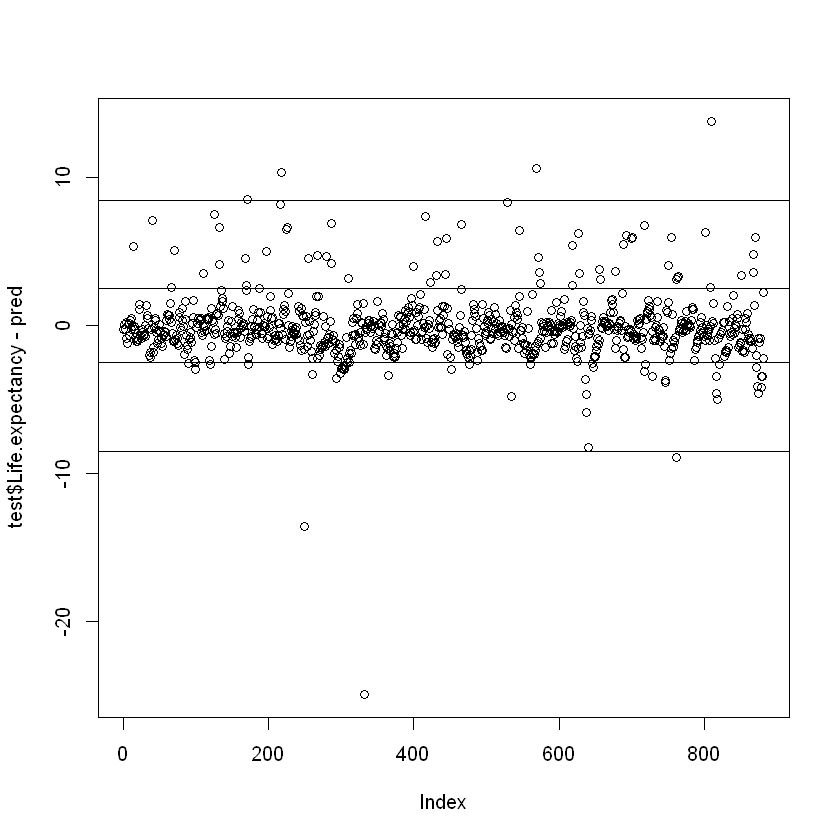

In [21]:
### Plot residuals
plot(test$Life.expectancy - pred)
abline(h = 2.5)
abline(h = -2.5)
abline(h = 8.5)
abline(h = -8.5)

In [22]:
sse(pred,test$Life.expectancy)

[1] 4229.357

### The R^2 score is .96, which is a good fit. Since we were dealing with a lot of NA values, we can expect our model to be bad at predicting the incomplete cases, which is okay. The majority of the residual points are between [-2.5,2.5], which could represent the predictions on our complete cases




### Dropping variables to deal with multicollinearity

#### 4: Model Tuning


Reducing the complexity of our model by performing feature selection

In [23]:

myMat = as.matrix(cor(train[5:ncol(train)]))

### Use a correlation matrix to find out which variables are most related.
for (i in 1:ncol(myMat)){
     print("--------------------")
     name =  names(which(myMat[i,] == 1))
     print(name)
     print("Positive Correlations:")
     print(names(which(myMat[i,] > .5)))
     
}

Warning message in cor(train[5:ncol(train)]):
"the standard deviation is zero"

[1] "--------------------"
[1] "percentage.expenditure"
[1] "Positive Correlations:"
[1] "percentage.expenditure" "GDP"                   
[1] "--------------------"
[1] "Hepatitis.B"
[1] "Positive Correlations:"
[1] "Hepatitis.B"
[1] "--------------------"
[1] "Measles"
[1] "Positive Correlations:"
[1] "Measles"           "under.five.deaths"
[1] "--------------------"
[1] "BMI"
[1] "Positive Correlations:"
[1] "BMI"
[1] "--------------------"
[1] "under.five.deaths"
[1] "Positive Correlations:"
[1] "Measles"           "under.five.deaths" "df.CountryIndia"  
[1] "--------------------"
[1] "Polio"
[1] "Positive Correlations:"
[1] "Polio"      "Diphtheria"
[1] "--------------------"
[1] "Total.expenditure"
[1] "Positive Correlations:"
[1] "Total.expenditure"
[1] "--------------------"
[1] "Diphtheria"
[1] "Positive Correlations:"
[1] "Polio"      "Diphtheria"
[1] "--------------------"
[1] "HIV.AIDS"
[1] "Positive Correlations:"
[1] "HIV.AIDS"
[1] "--------------------"
[1] "GDP"
[1] "Po

#### Noteable variables to look at:

 "infant.deaths"   -  "Measles"     -      "under.five.deaths"
 
 
 "percentage.expenditure"   - "GDP"          -           "Schooling"             
 

 "Hepatitis.B"  -  "Diphtheria" 
 

 "thinness..1.19.years"  - "thinness.5.9.years"  


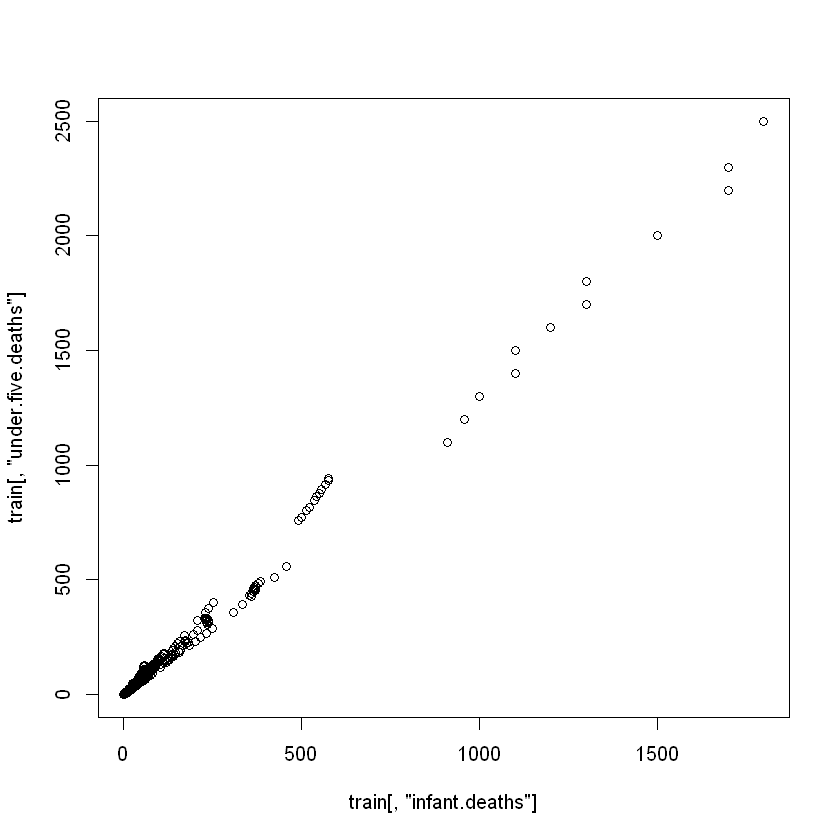

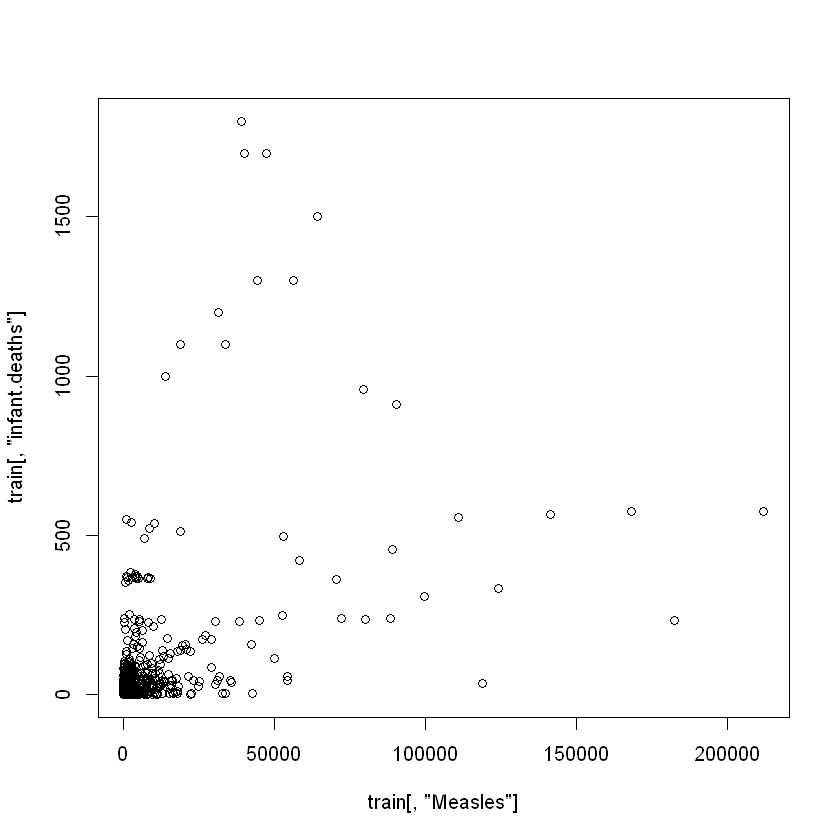

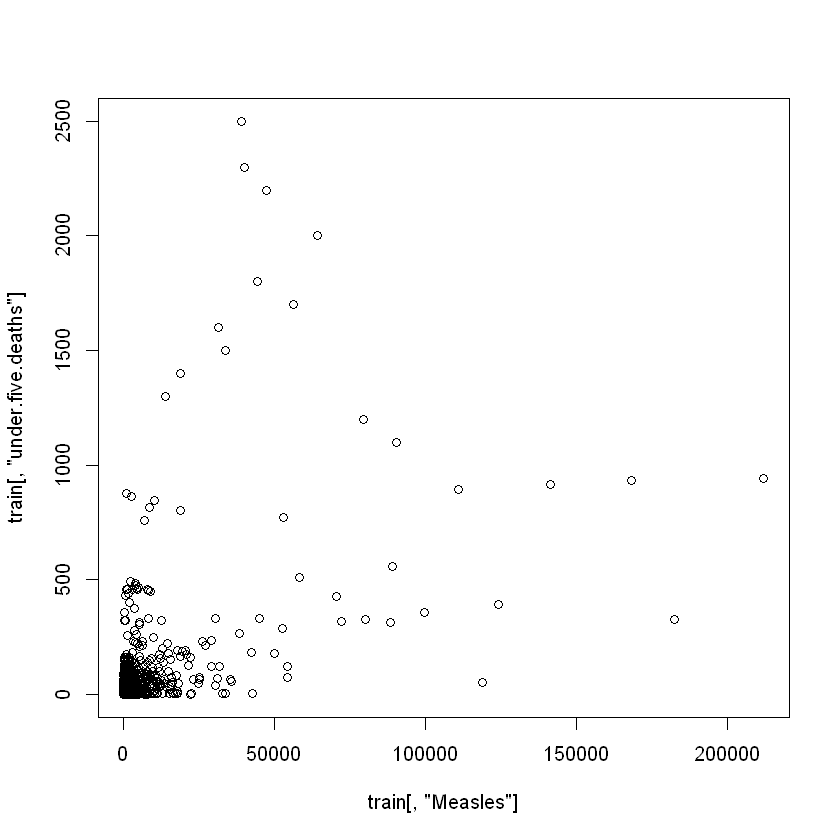

In [24]:
plot(train[,"infant.deaths"],train[,"under.five.deaths"])
plot(train[,"Measles"],train[,"infant.deaths"])
plot(train[,"Measles"],train[,"under.five.deaths"])


In [25]:
cor(train$Life.expectancy,train$infant.deaths)
cor(train$Life.expectancy,train$under.five.deaths)

[1] -0.1989067

[1] -0.2239817

### It appears that infant deaths and under.five.deaths are highly correlated. We will drop" infant deaths" since "under five deaths" has a higher correlation to life expectancy than "infant deaths."

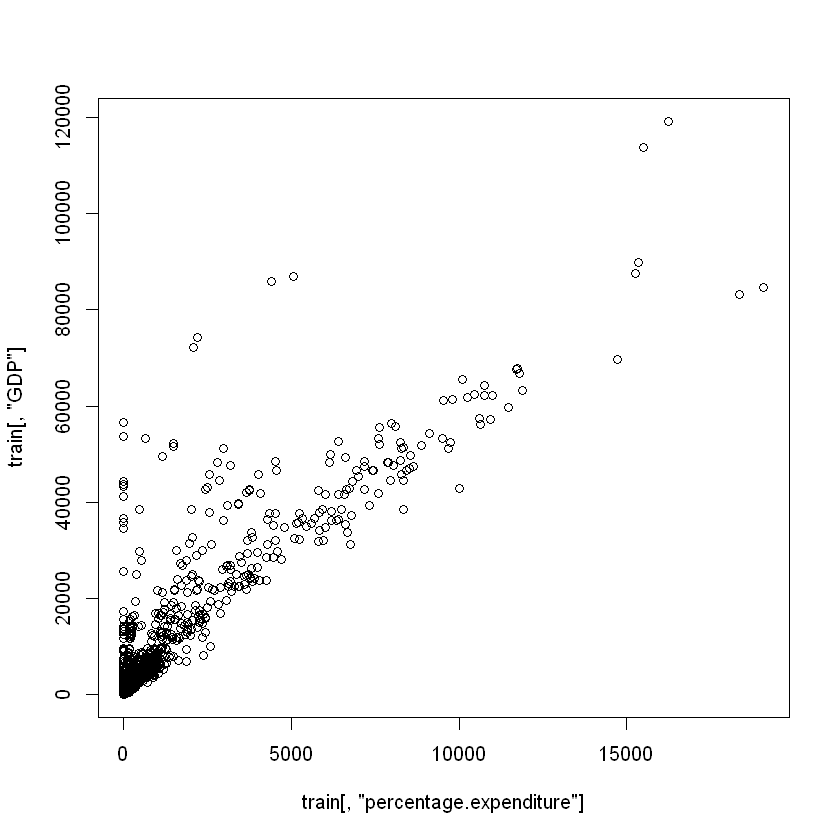

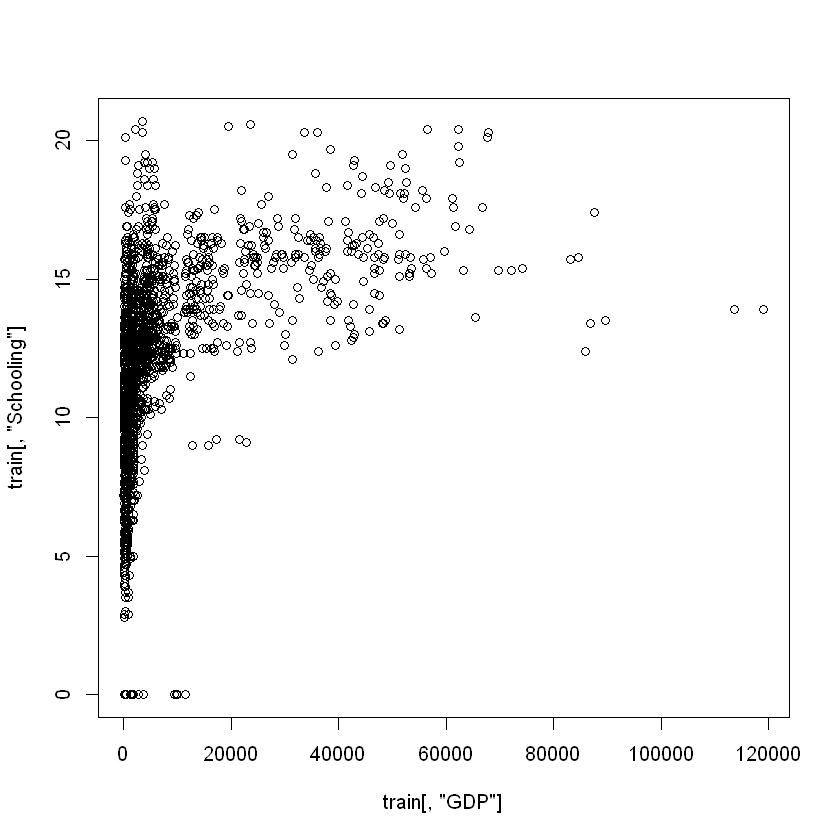

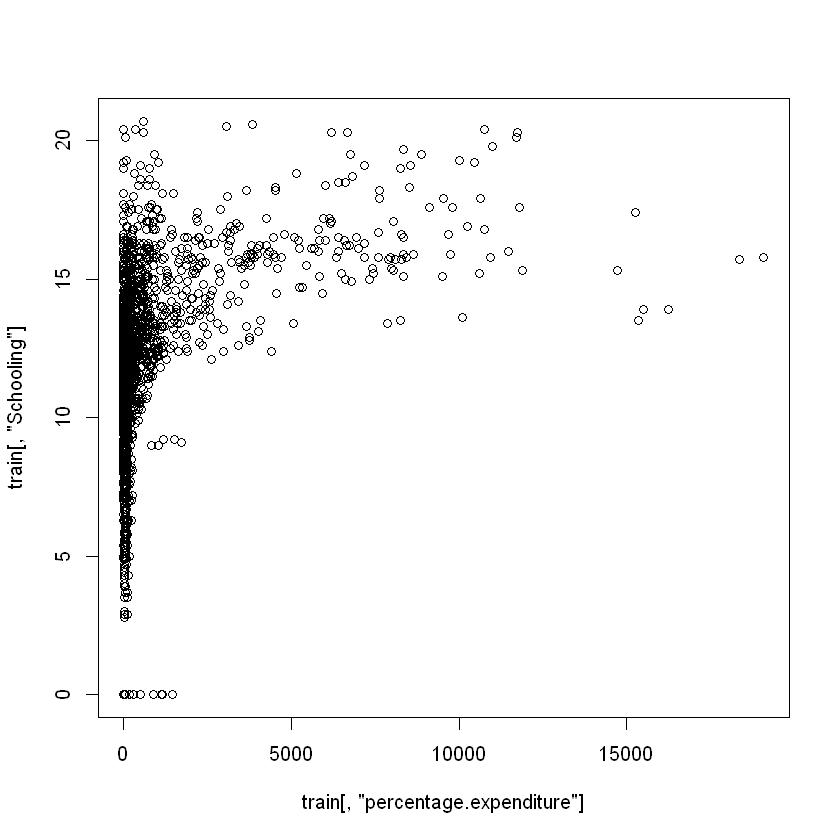

In [26]:
plot(train[,"percentage.expenditure"],train[,"GDP"])
plot(train[ ,"GDP"],train[,"Schooling"])
plot(train[ ,"percentage.expenditure"],train[,"Schooling"])

In [27]:
cor(train$Life.expectancy,train$GDP)
cor(train$Life.expectancy,train$percentage.expenditure)

[1] 0.4409879

[1] 0.3912612

### Percentage expenditure is highly correlated with GDP.  We will drop "percentage.expenditure" since "GDP" has a higher correlation with life expectancy

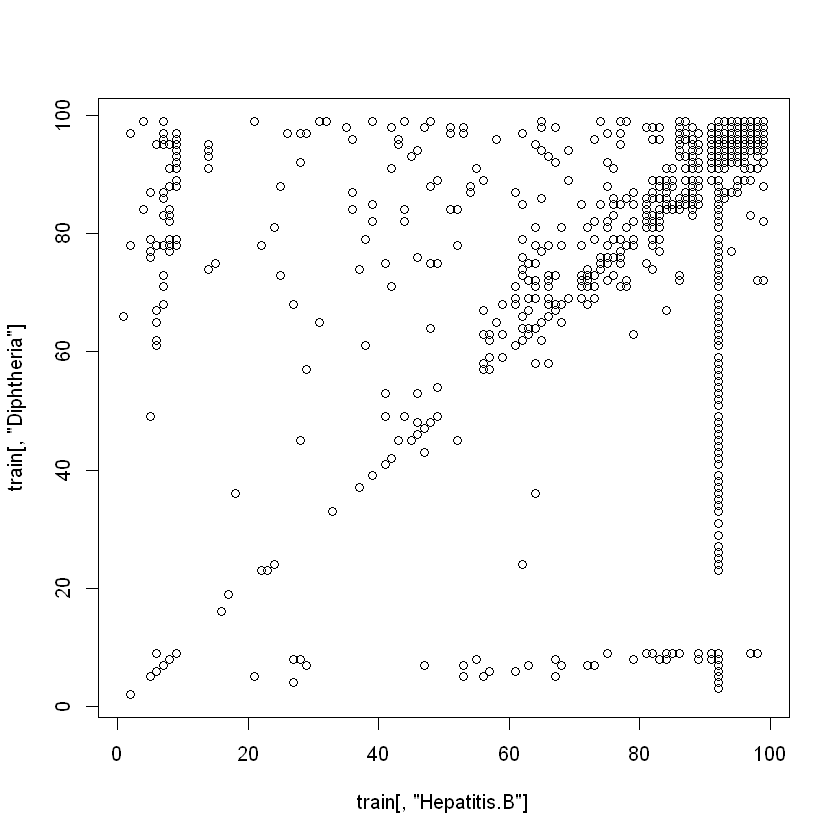

In [28]:
plot(x = train[,"Hepatitis.B"],y = train[,"Diphtheria"])

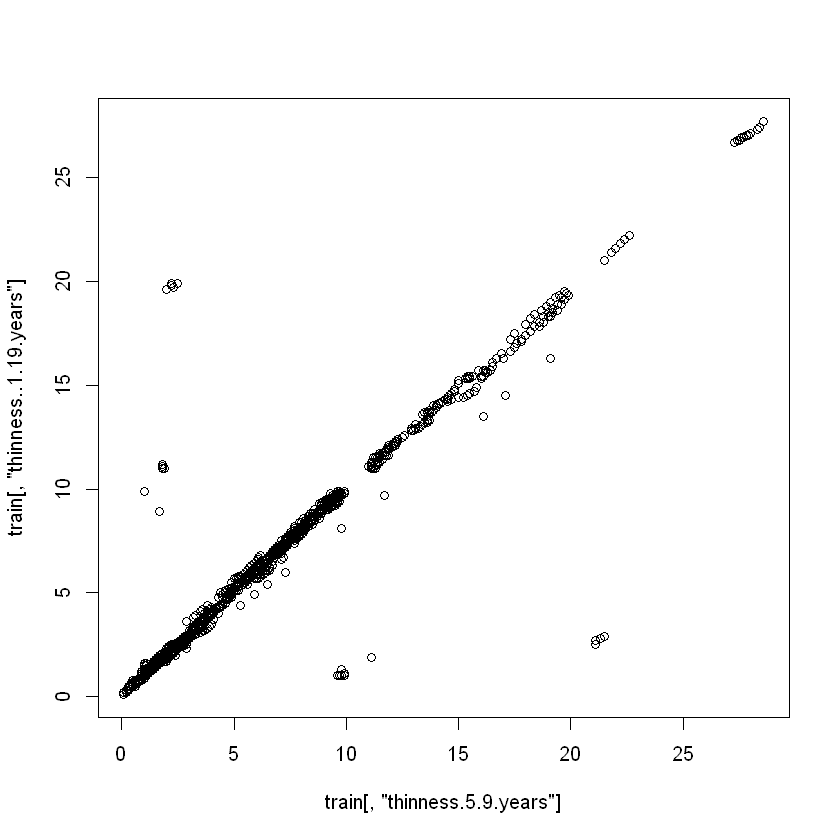

In [47]:
plot(x = train[,"thinness.5.9.years" ],y = train[,"thinness..1.19.years"])

In [49]:
cor(train$Life.expectancy,train$thinness.5.9.years)
cor(train$Life.expectancy,train$thinness..1.19.years)

[1] -0.471266

[1] -0.4776455

### Based on the visualization, it is quite random. We will keep both variables.




### FEATURES TO DROP: infant.deaths, percentage.expenditure

In [50]:
train2 = subset(train,select = -c(infant.deaths,percentage.expenditure,Population,thinness..1.19.years))

In [51]:
test2 = subset(test,select = -c(infant.deaths,percentage.expenditure,Population,thinness..1.19.years))

In [52]:
model2 = lm(Life.expectancy~., data = train2)

In [53]:
summary(model2)


Call:
lm(formula = Life.expectancy ~ ., data = train2)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.6700 -0.8592 -0.2221  0.4571  9.3197 

Coefficients: (6 not defined because of singularities)
                                                                 Estimate
(Intercept)                                                    -4.612e+02
Adult.Mortality                                                -5.320e-04
Alcohol                                                        -5.985e-02
Hepatitis.B                                                    -4.247e-03
Measles                                                        -1.510e-05
BMI                                                            -6.083e-03
under.five.deaths                                              -2.799e-03
Polio                                                           3.219e-03
Total.expenditure                                              -2.960e-02
Diphtheria                                            

In [54]:
pred2 = predict(model2,test2)

Warning message in predict.lm(model2, test2):
"prediction from a rank-deficient fit may be misleading"

[1] "RESIDUALS FOR MODEL2(graph on top) VS MODEL1(graph on bottom)"


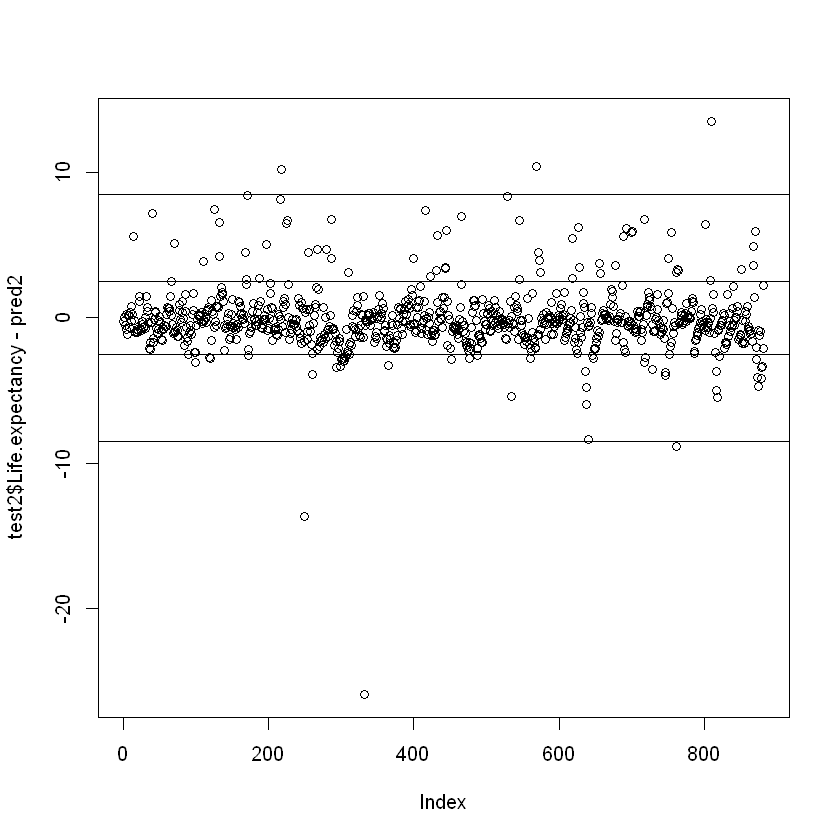

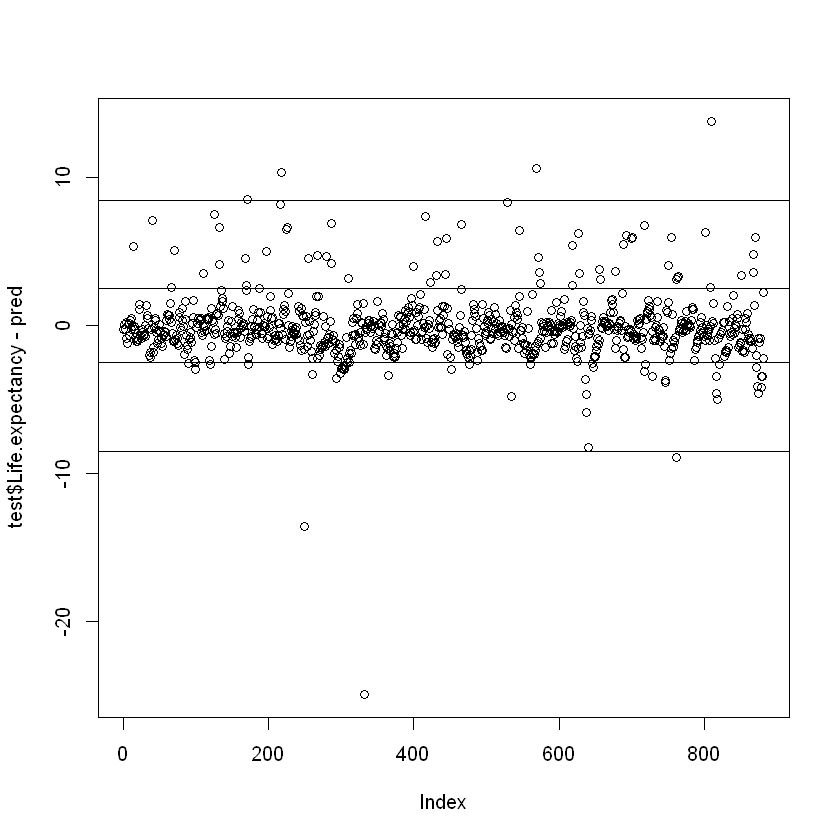

In [55]:
print("RESIDUALS FOR MODEL2(graph on top) VS MODEL1(graph on bottom)")
plot(test2$Life.expectancy-pred2)
abline(h = 2.5)
abline(h = -2.5)
abline(h = 8.5)
abline(h = -8.5)



plot(test$Life.expectancy-pred)
abline(h = 2.5)
abline(h = -2.5)
abline(h = 8.5)
abline(h = -8.5)

In [56]:
sse(pred2,test2$Life.expectancy)

[1] 4350.107

### With a reduction in complexity, our cost went up by about ~190. However, the majority of our data points are still sandwiched in between [-2.5,2.5].

### Which model should we choose? Our second linear regression model has reduced complexity, but in return the model has a slightly higher cost. Our residuals for model2 and model1 are similary to each other and it is hard to pinpoint which observations were most influenced by the feature selection process

#### 5: Applying a log transformation to our data


### Lets look at the distribution of our data and compare it to the log(X) distribution

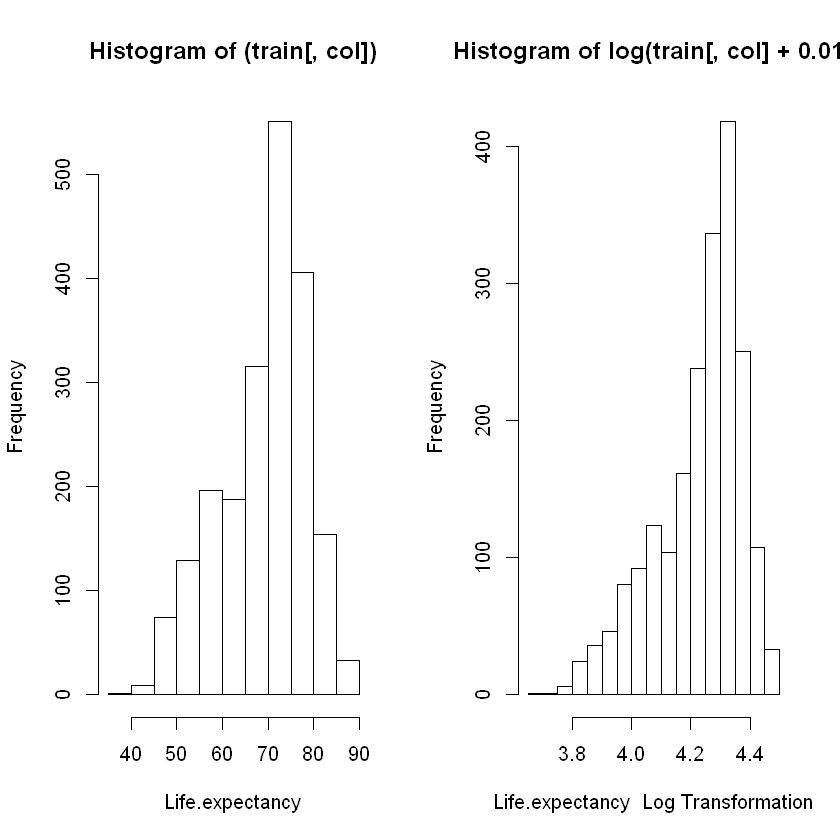

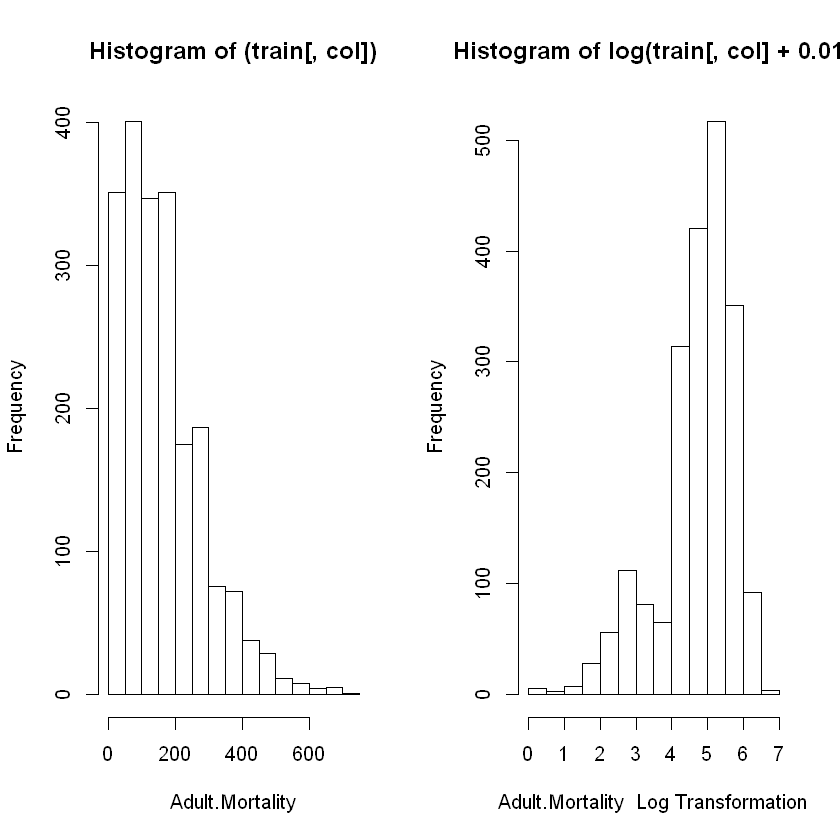

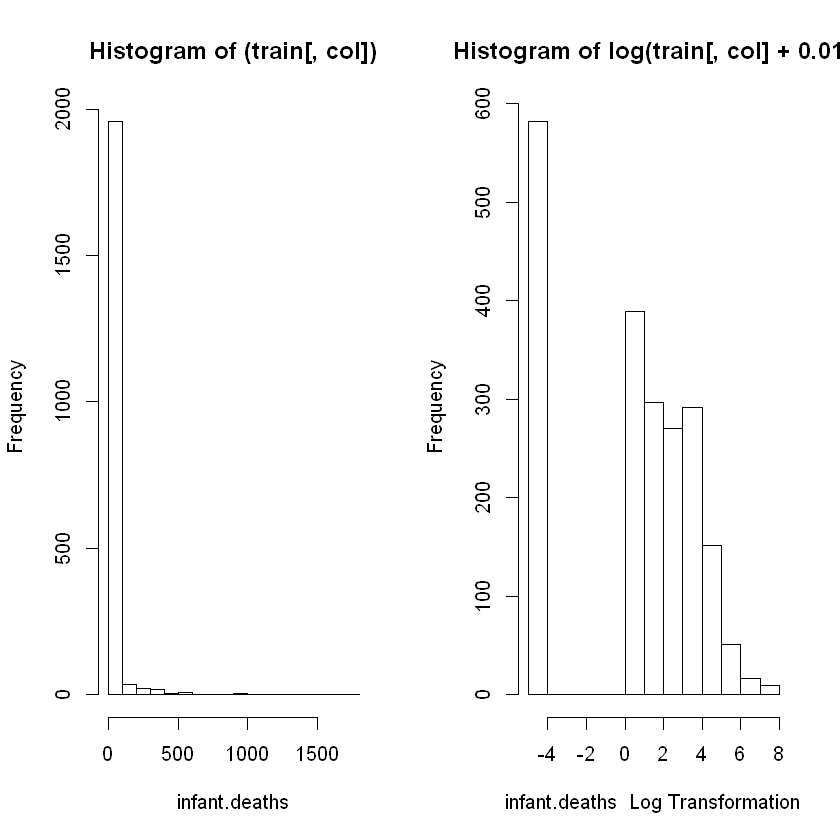

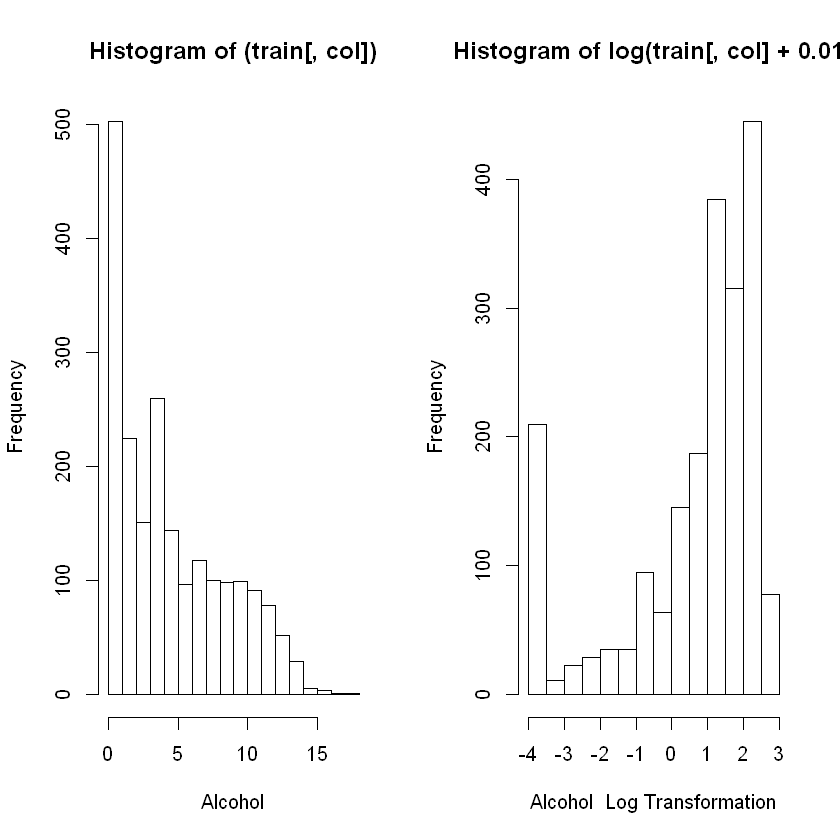

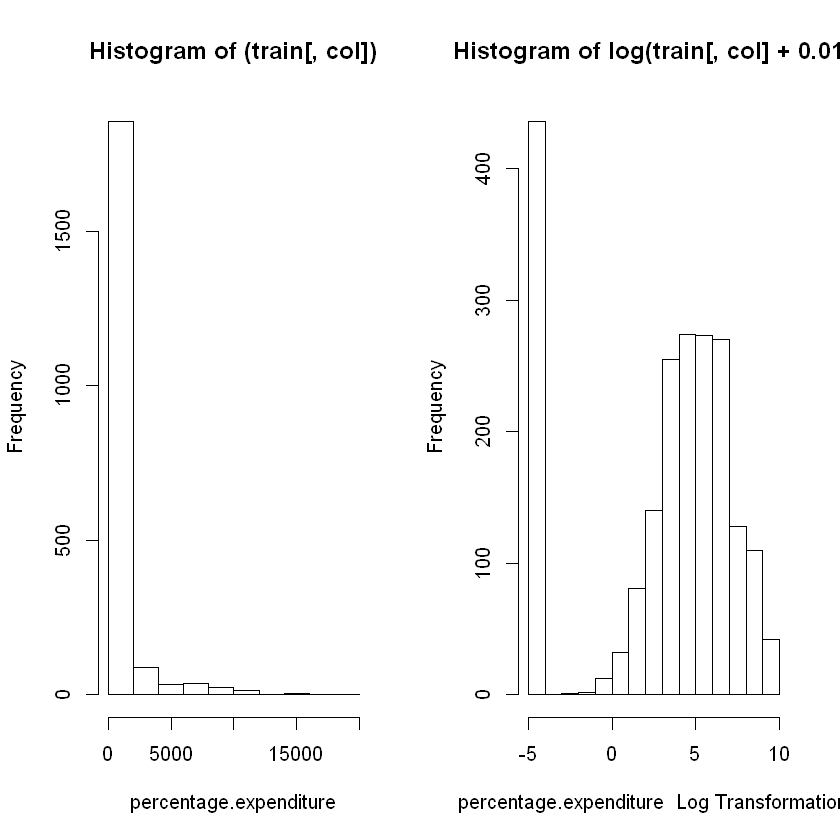

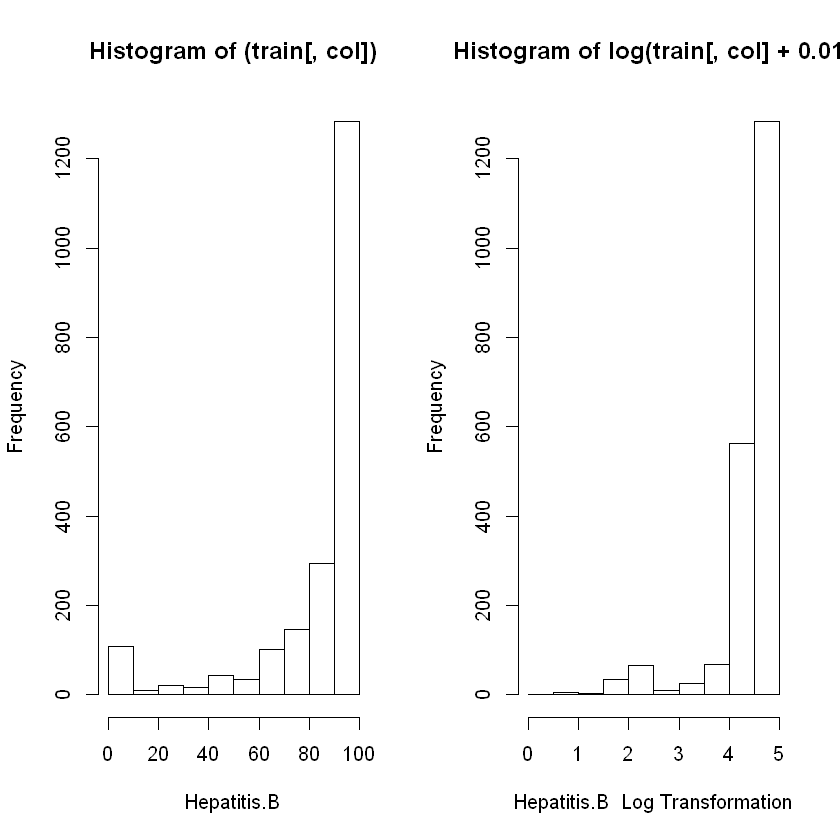

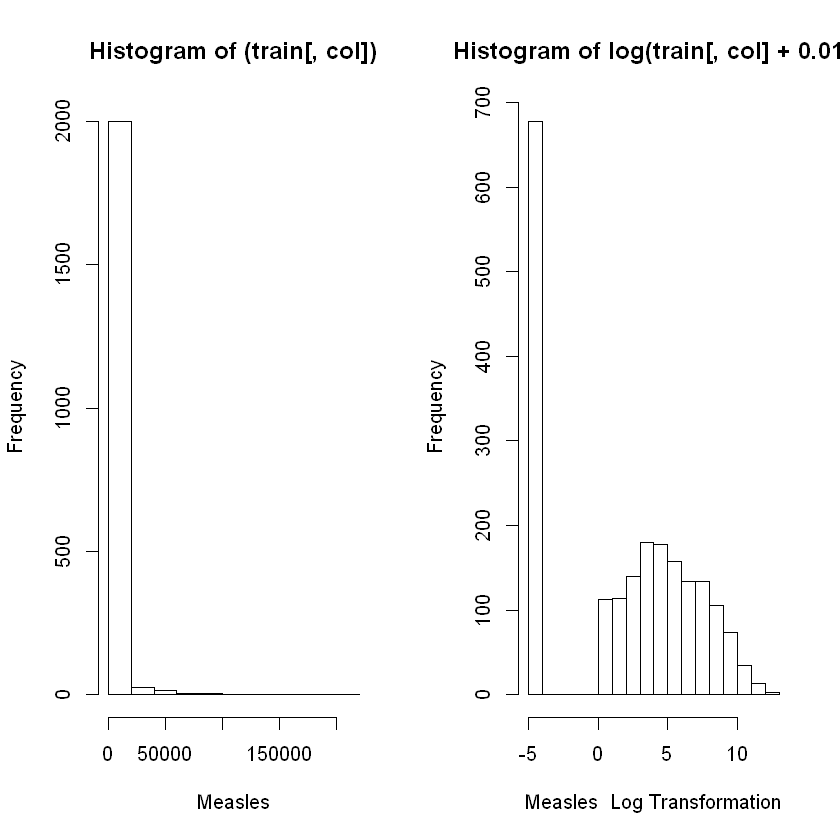

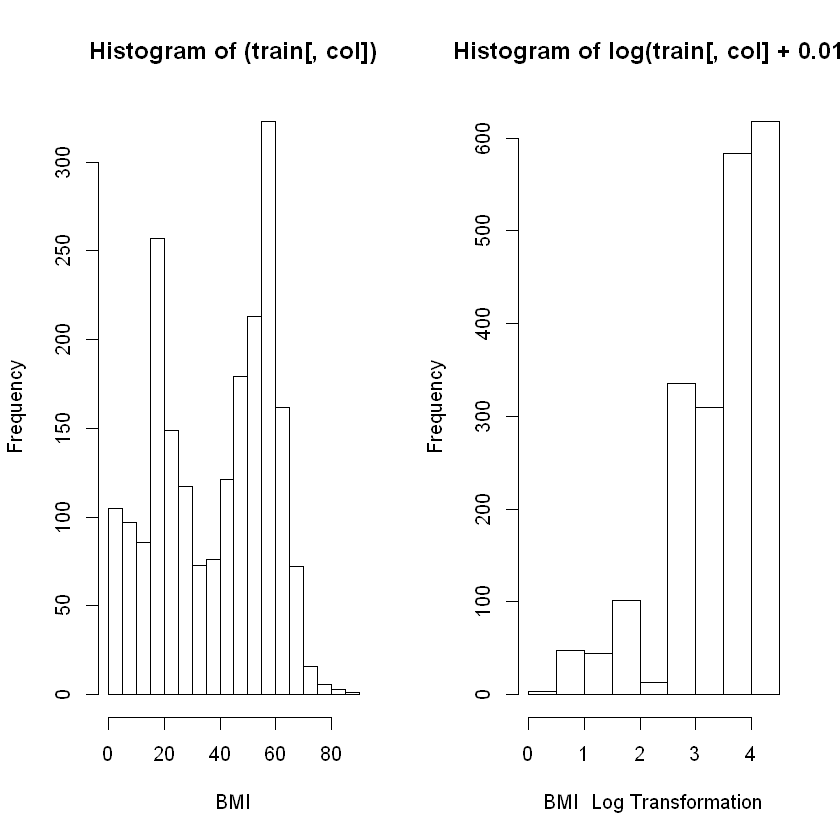

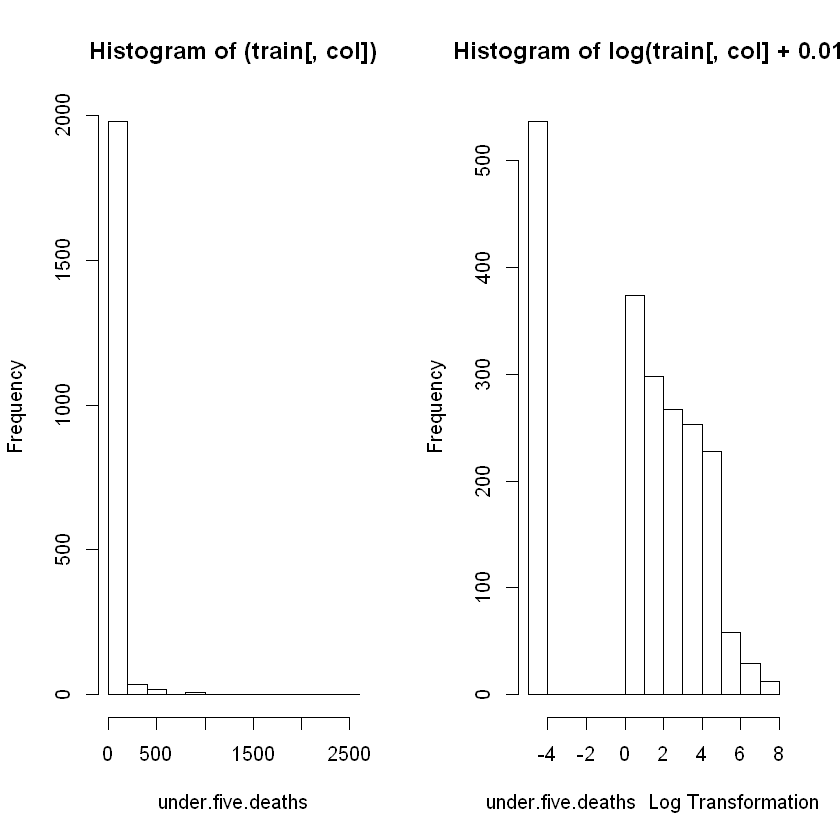

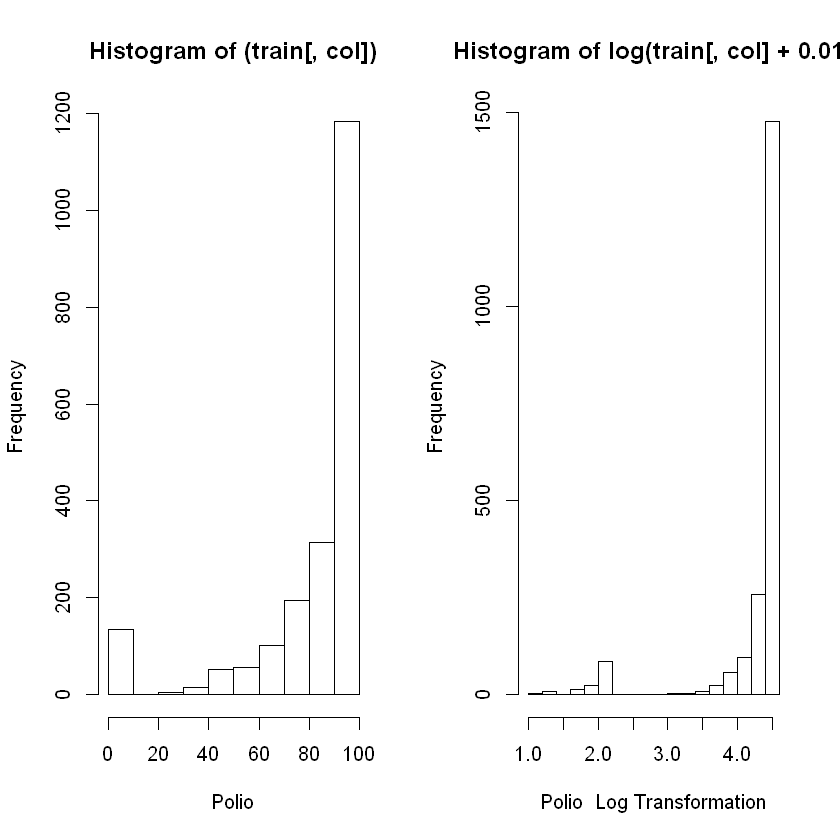

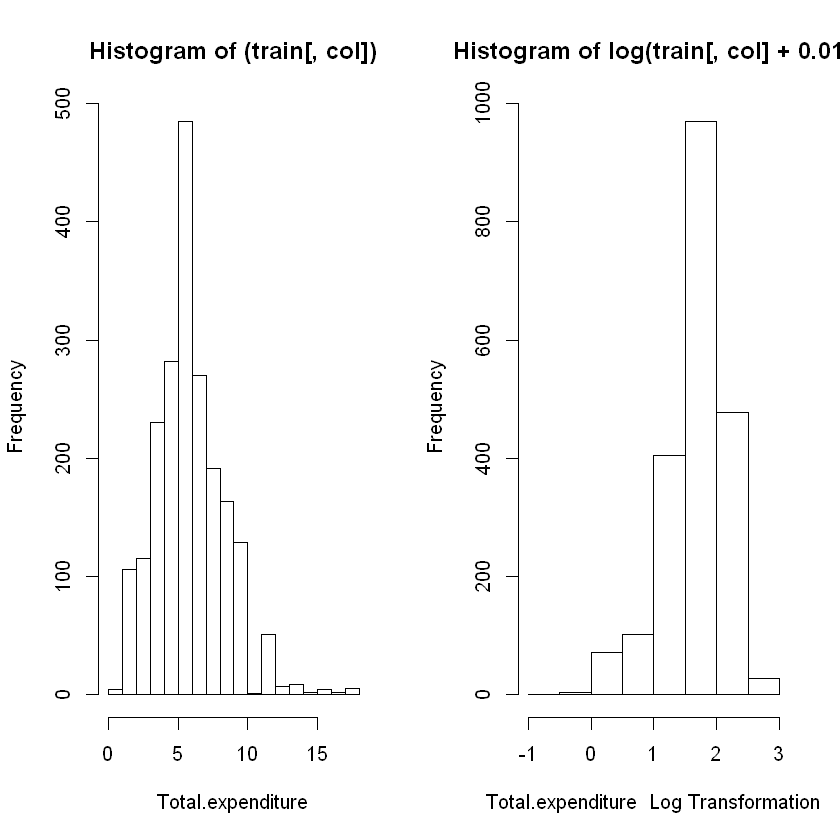

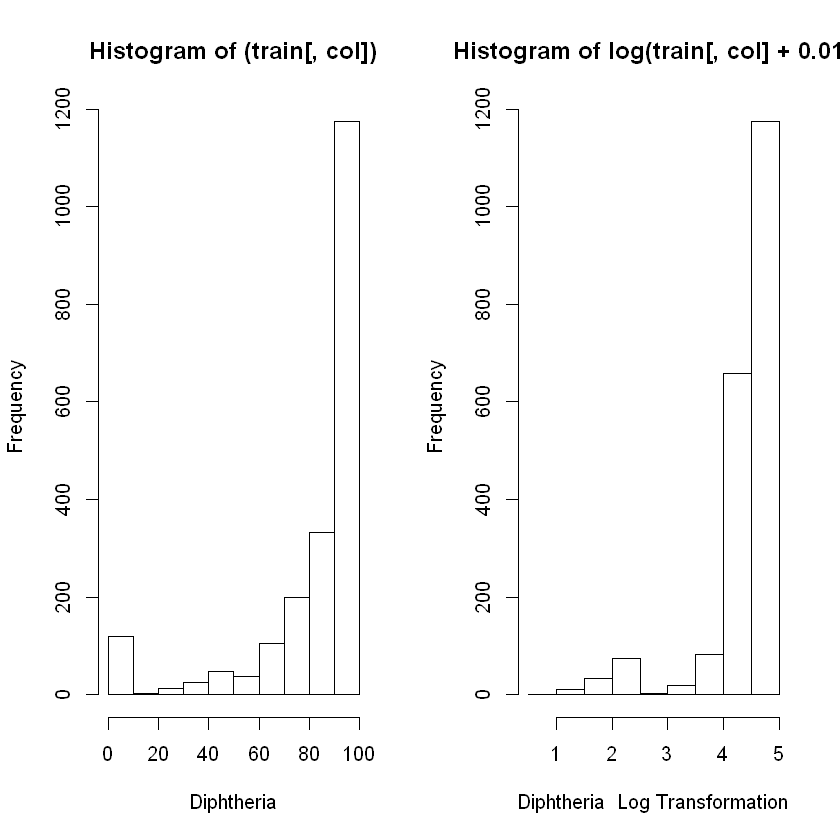

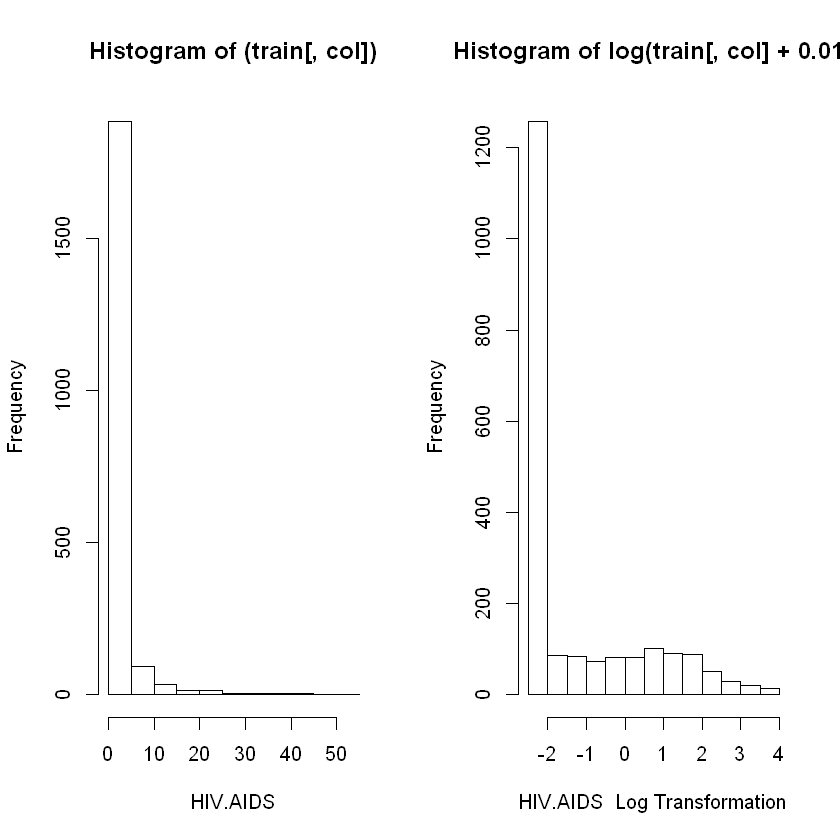

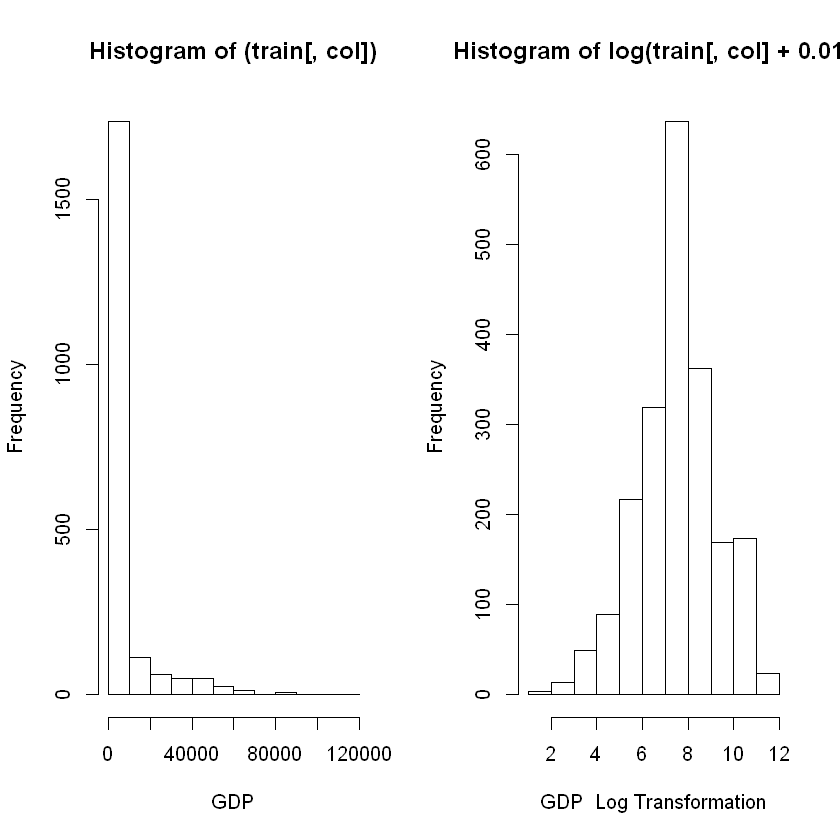

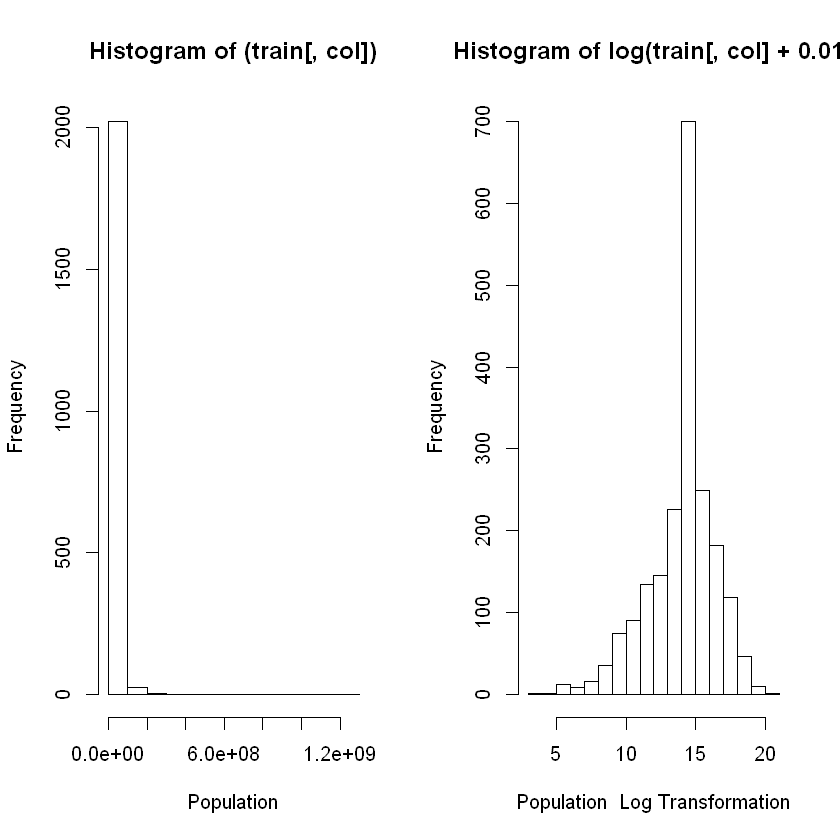

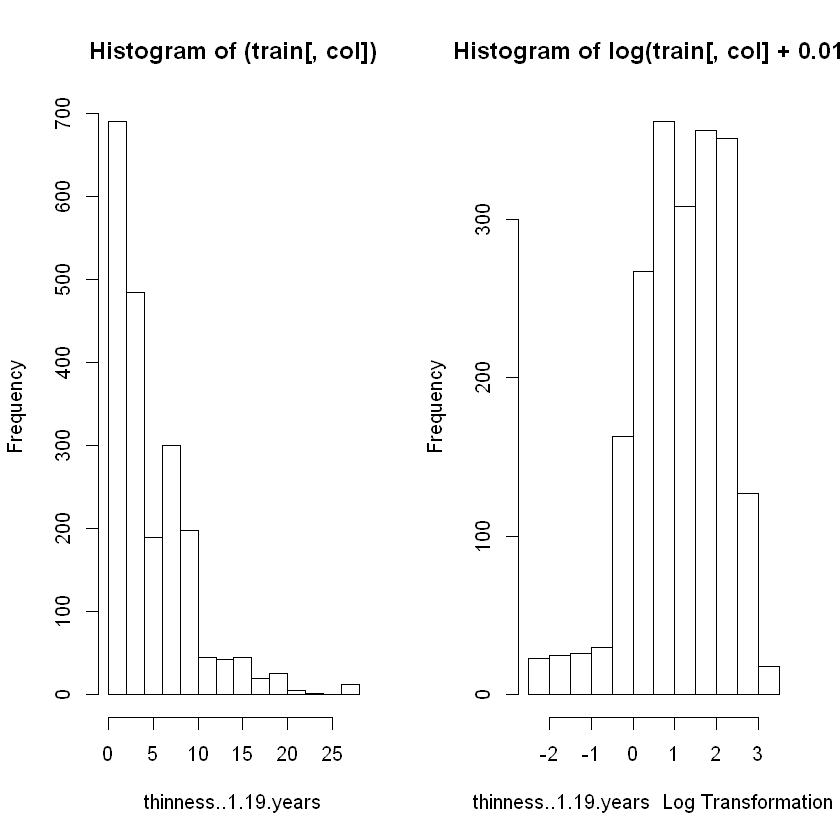

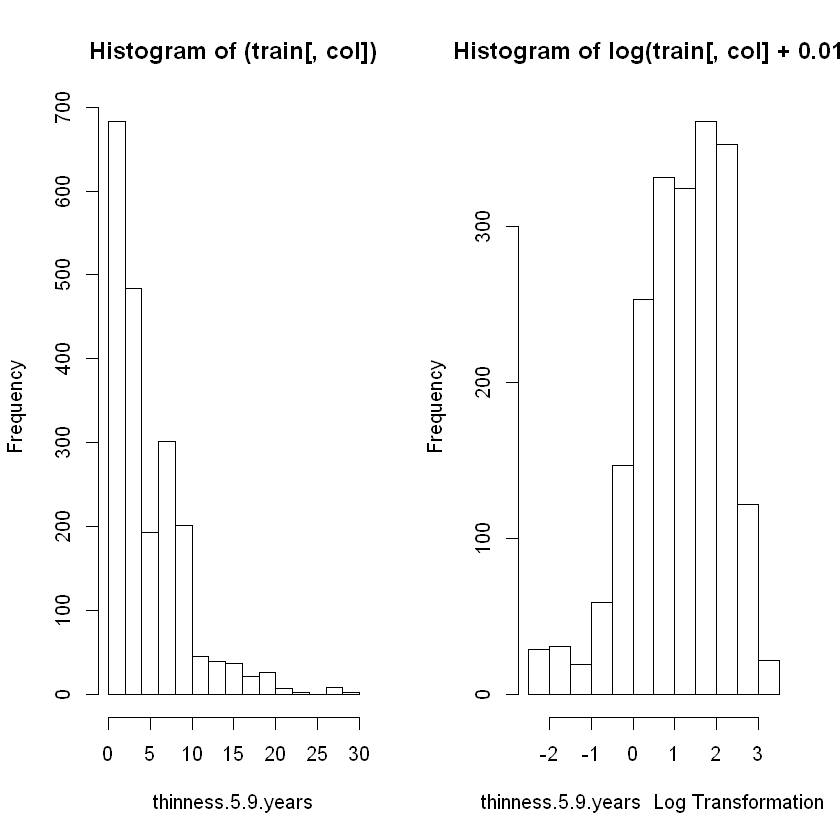

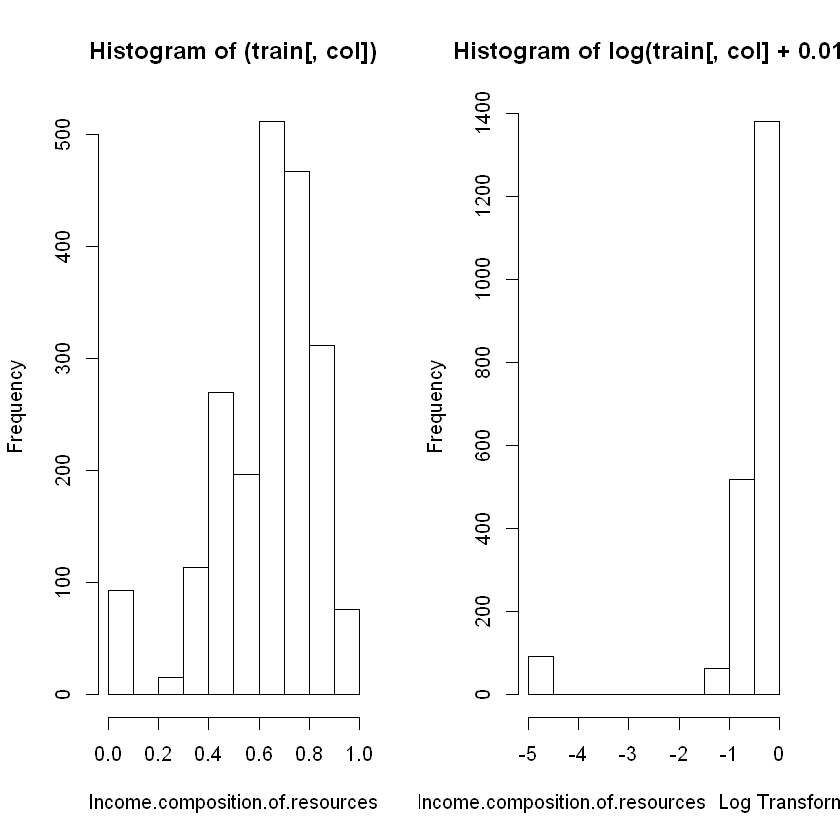

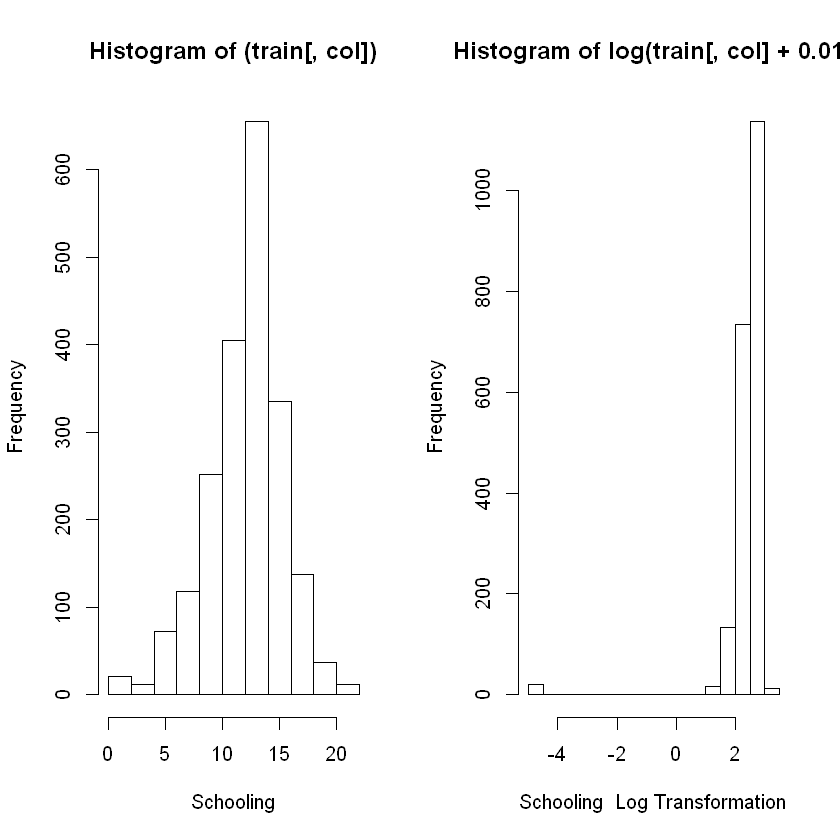

In [57]:
### Plotting the distribution of data

par(mfrow=c(1,2)) 
for (col in 1:19) {
    hist((train[,col]),xlab= colnames(train[col]))
    hist(log(train[,col]+.01),xlab = paste(colnames(train[col])," Log Transformation"))
}

In [82]:
### Apply a log transformation based on skewness

library("e1071")
train3 = train
test3 = test
for(i in 5:19){
    if(abs(skewness(train[,i])) > 1.5){
        train3[i] = train3[,i] +.1
        test3[i] = test3[,i] +.1
        train3[i] = log(train3[,i])
        test3[i] = log(test3[,i])
    }
}

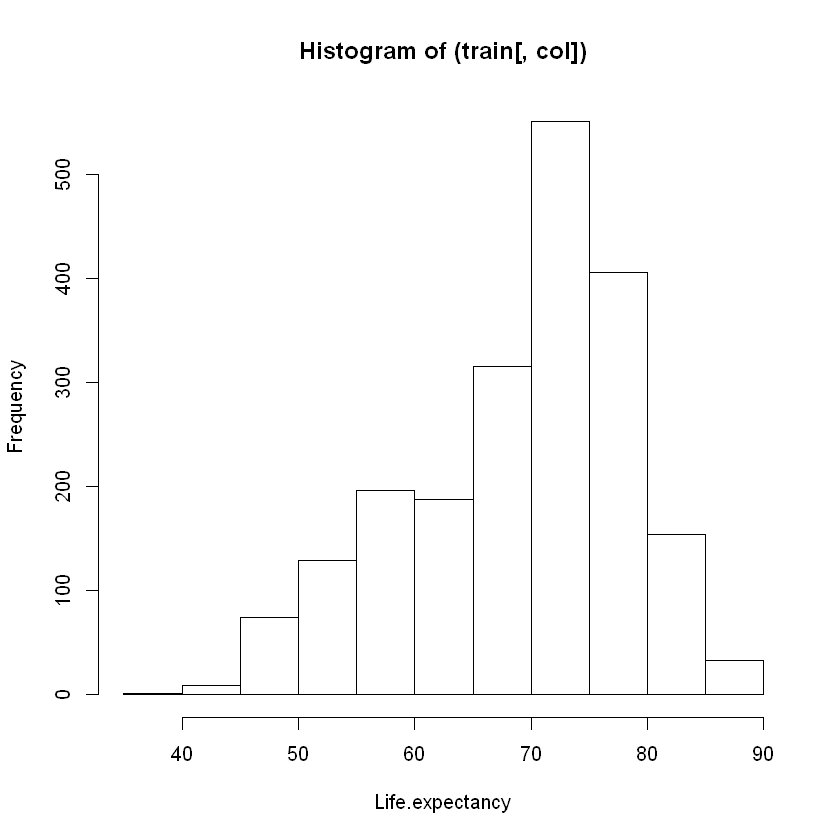

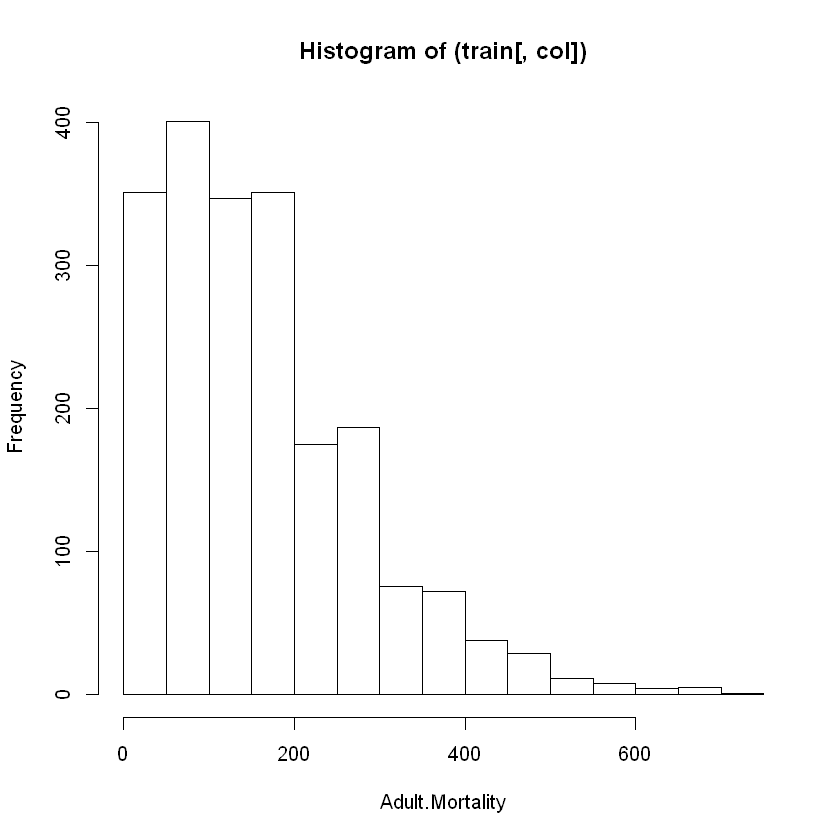

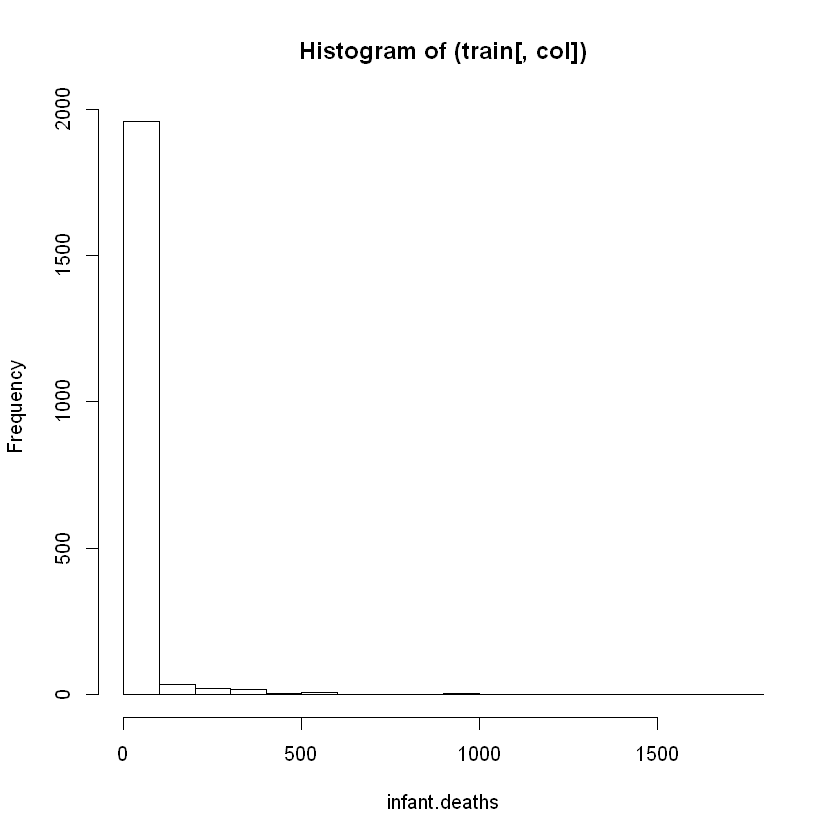

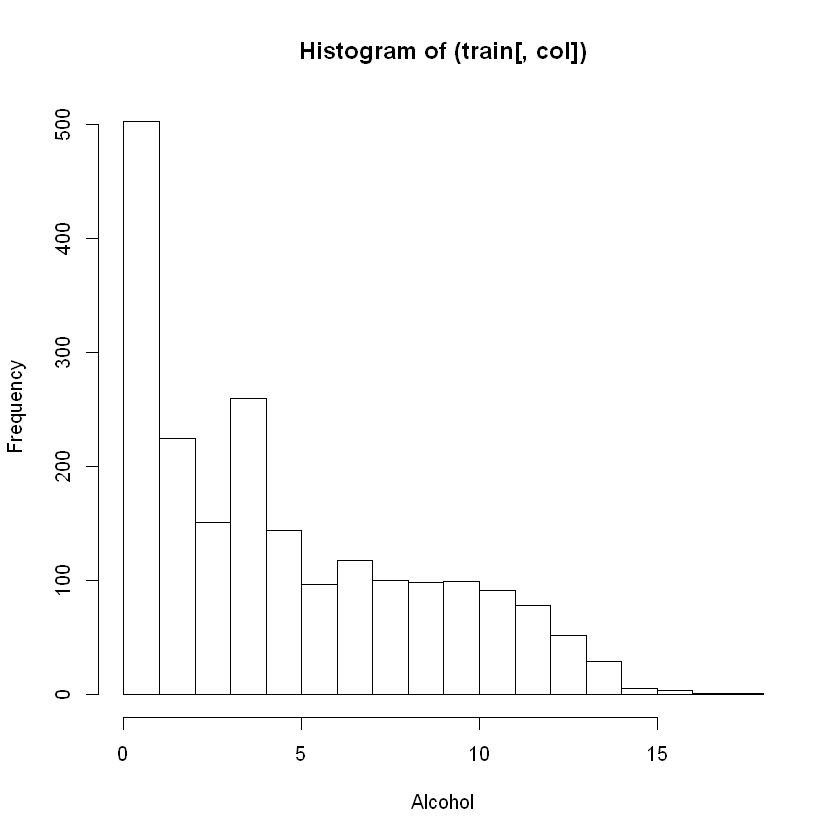

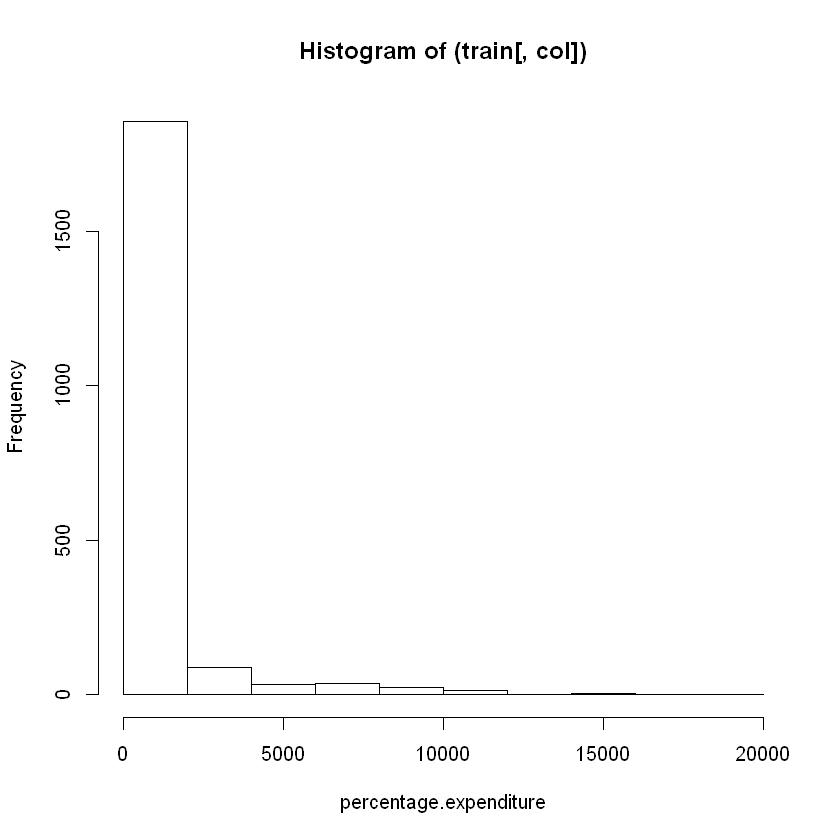

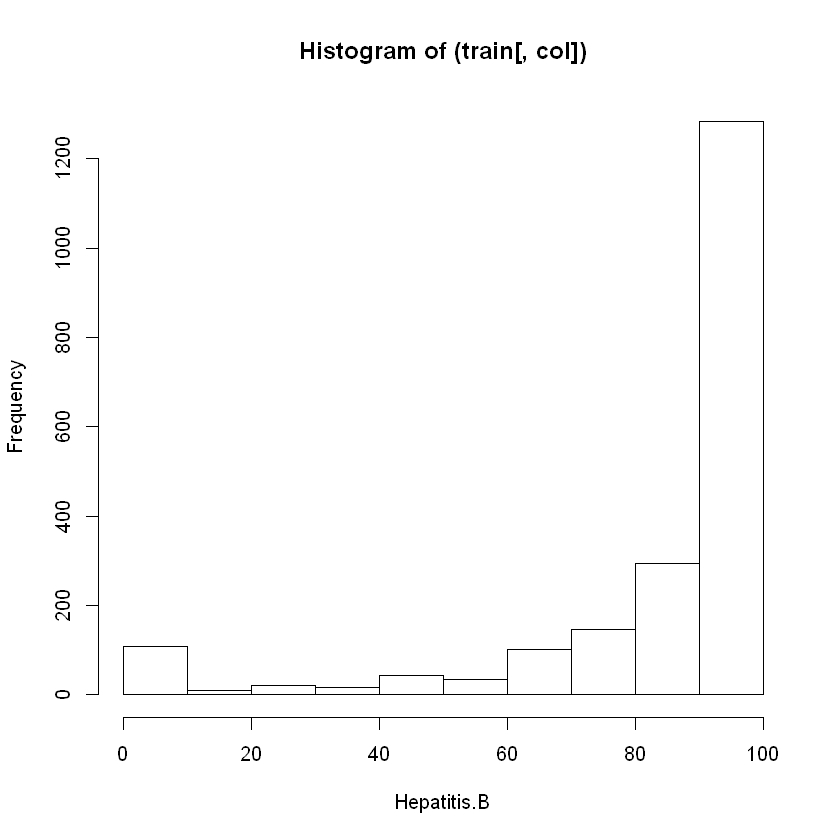

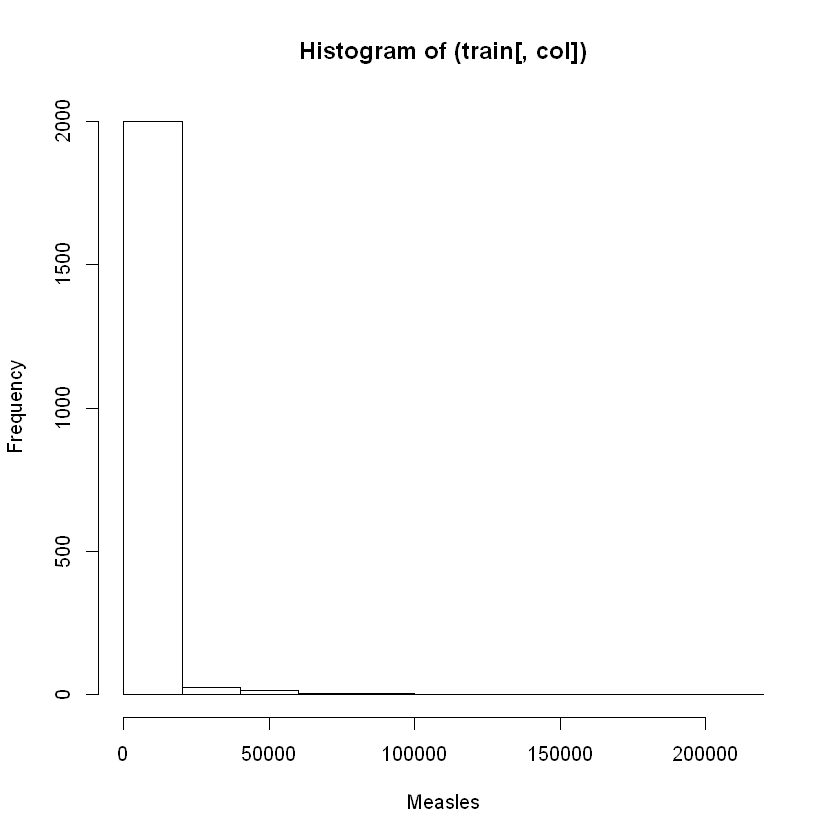

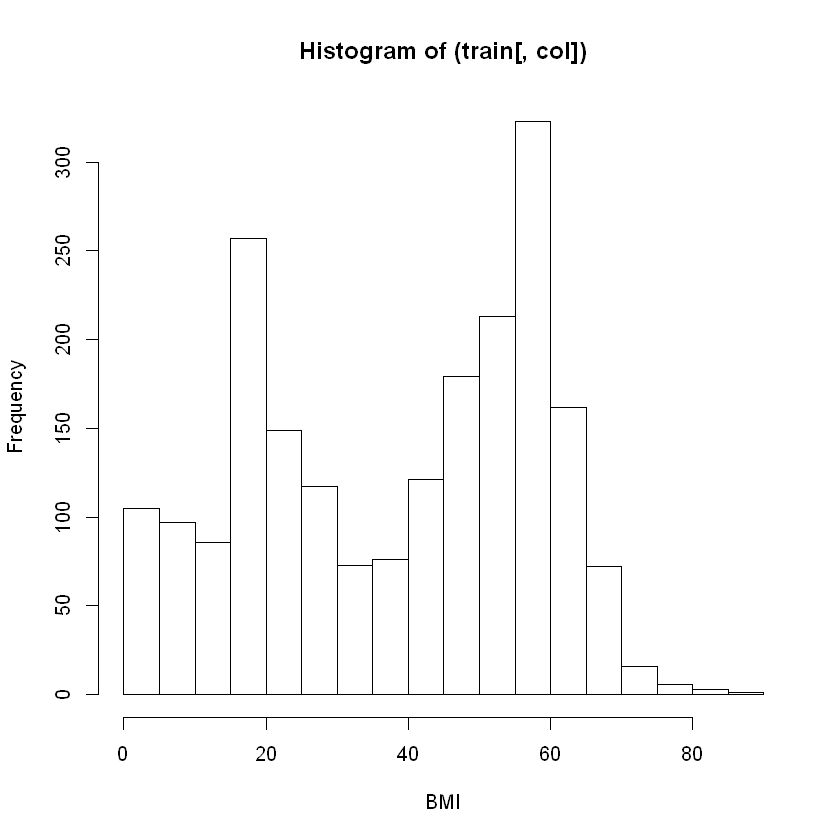

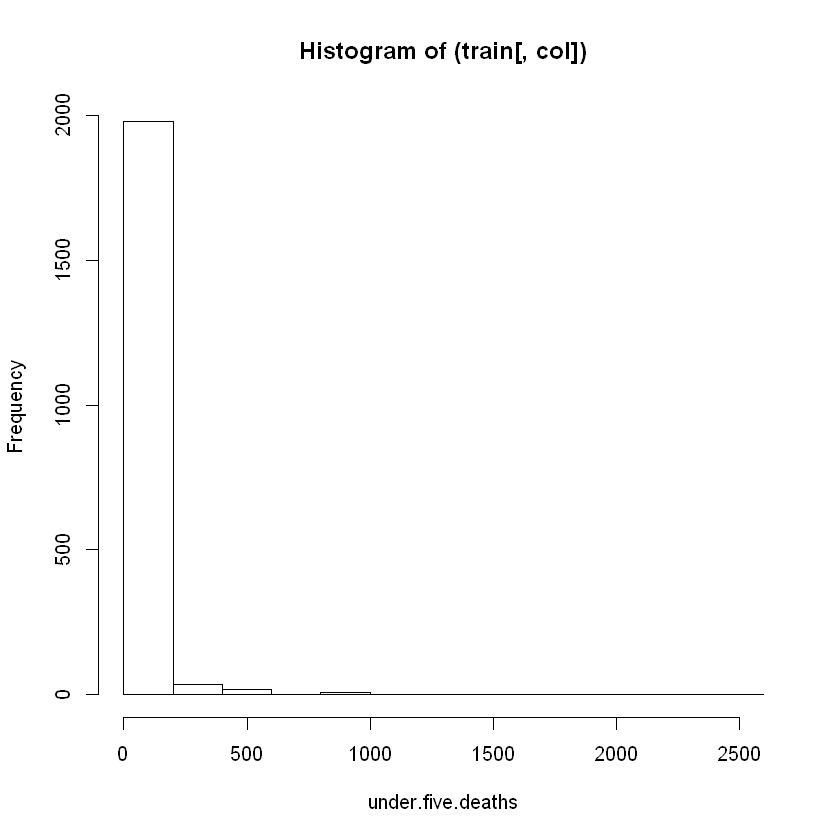

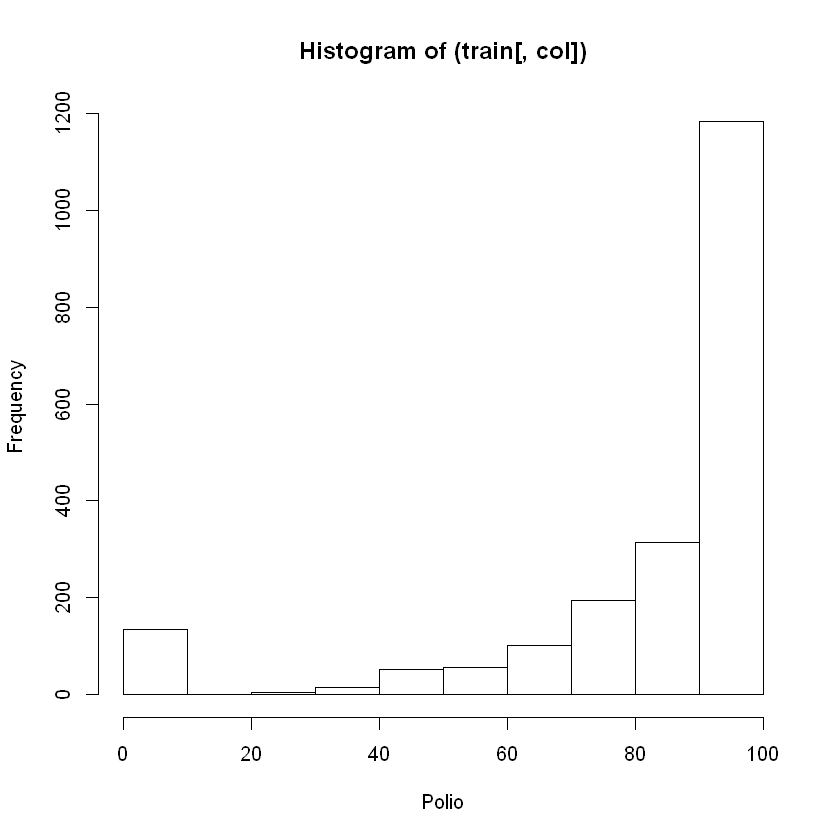

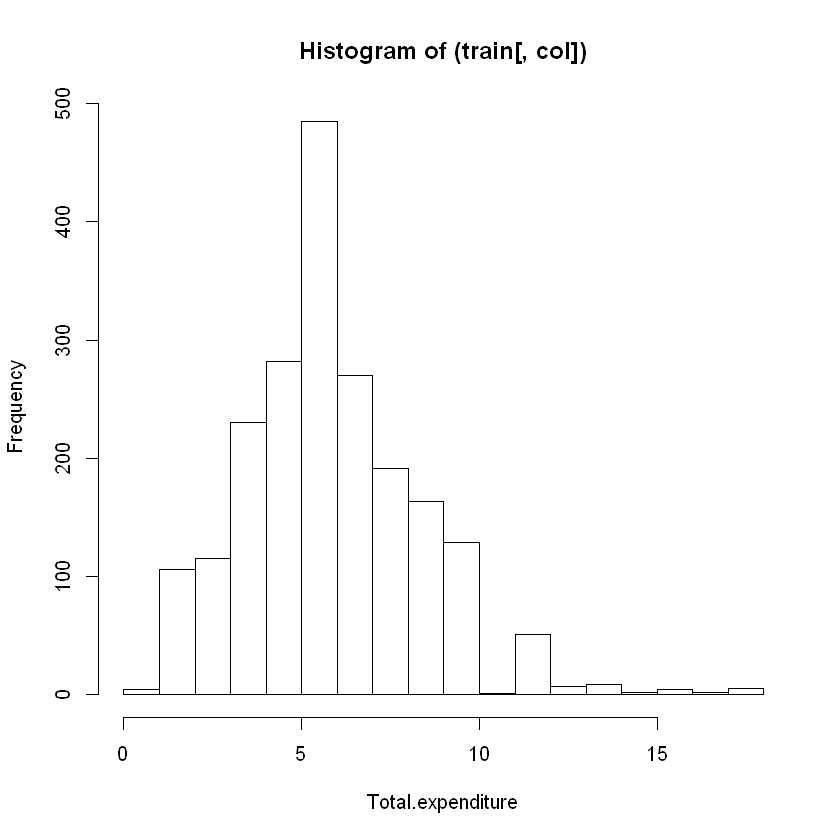

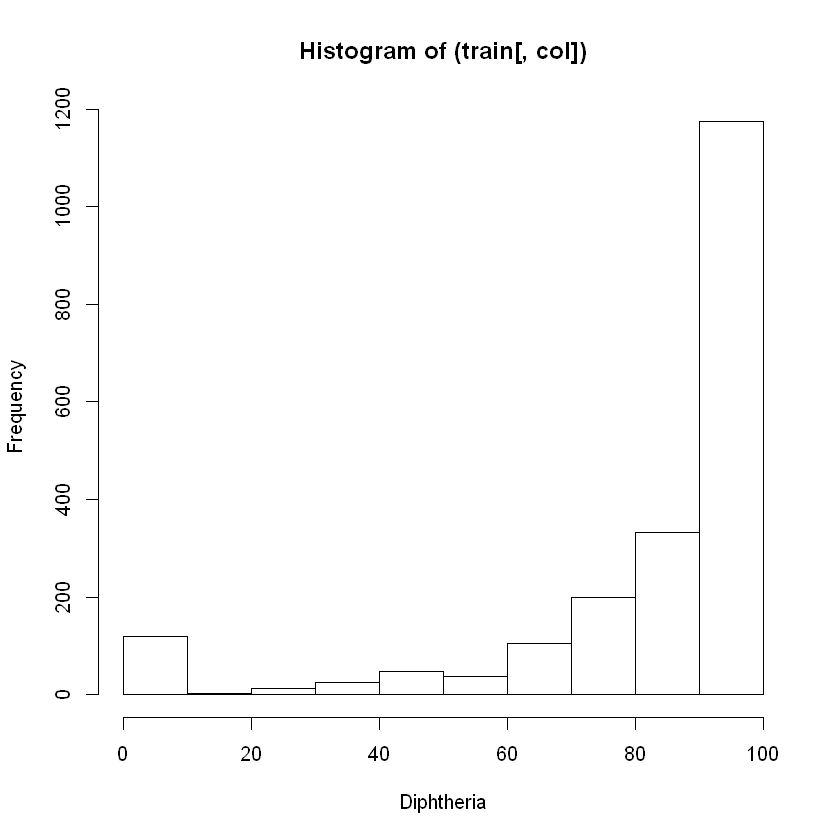

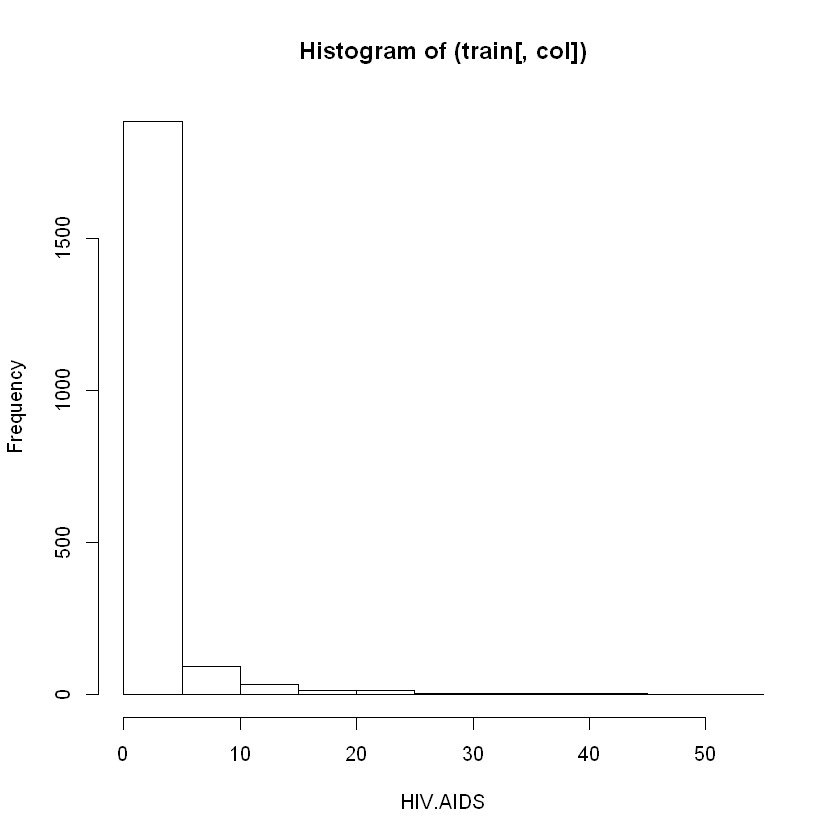

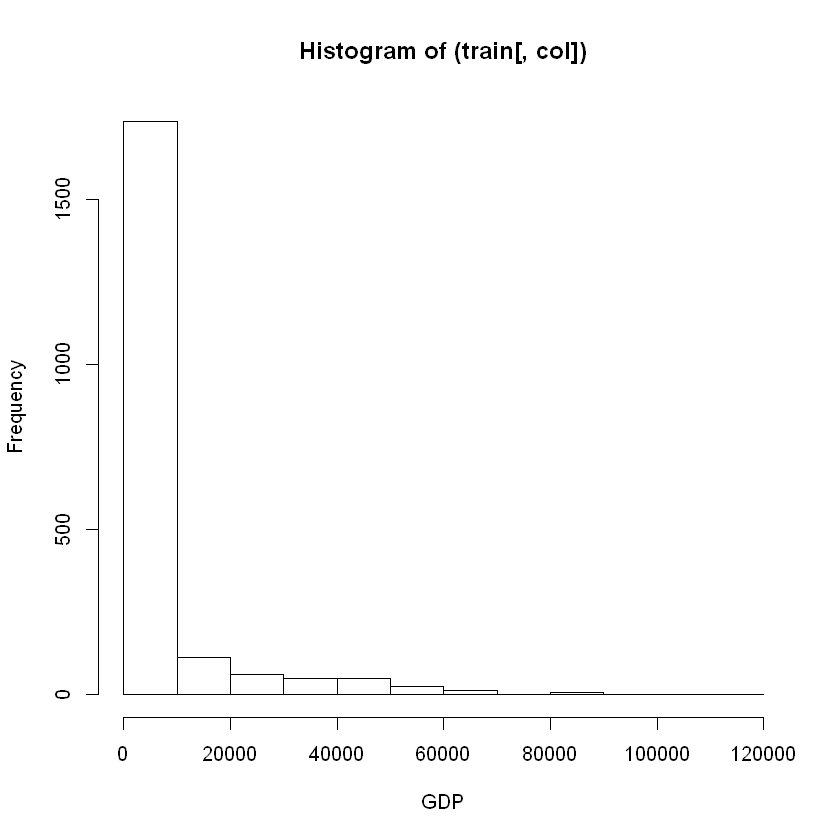

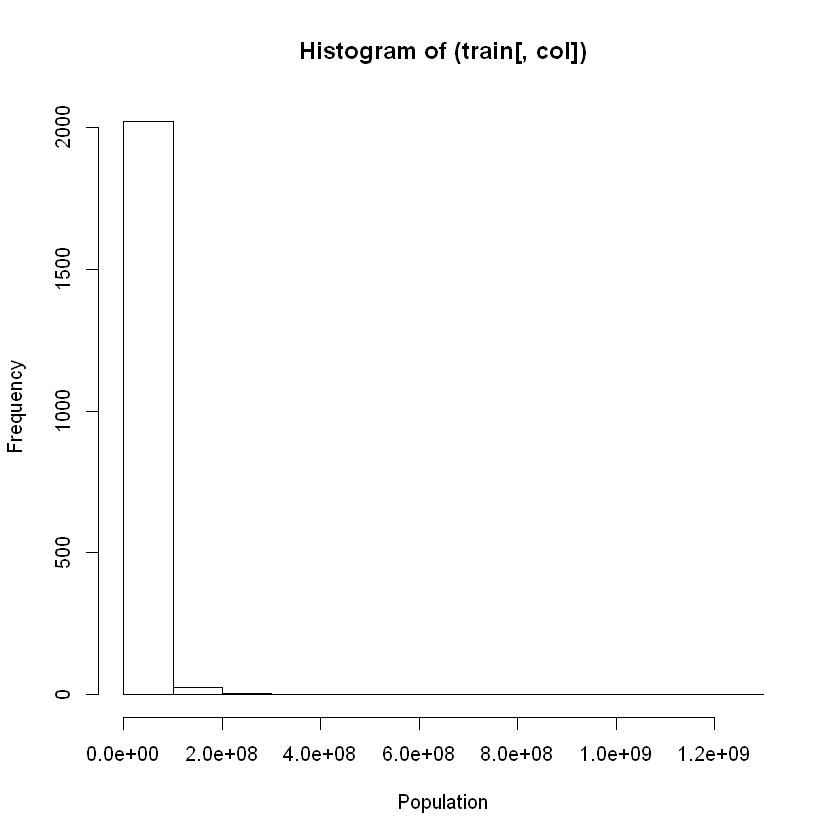

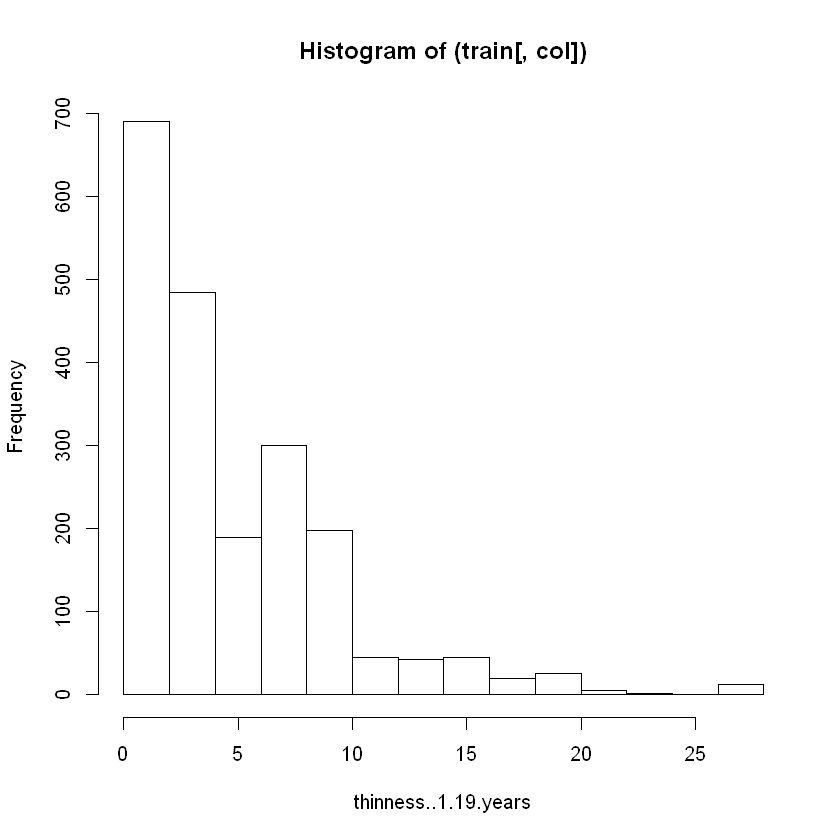

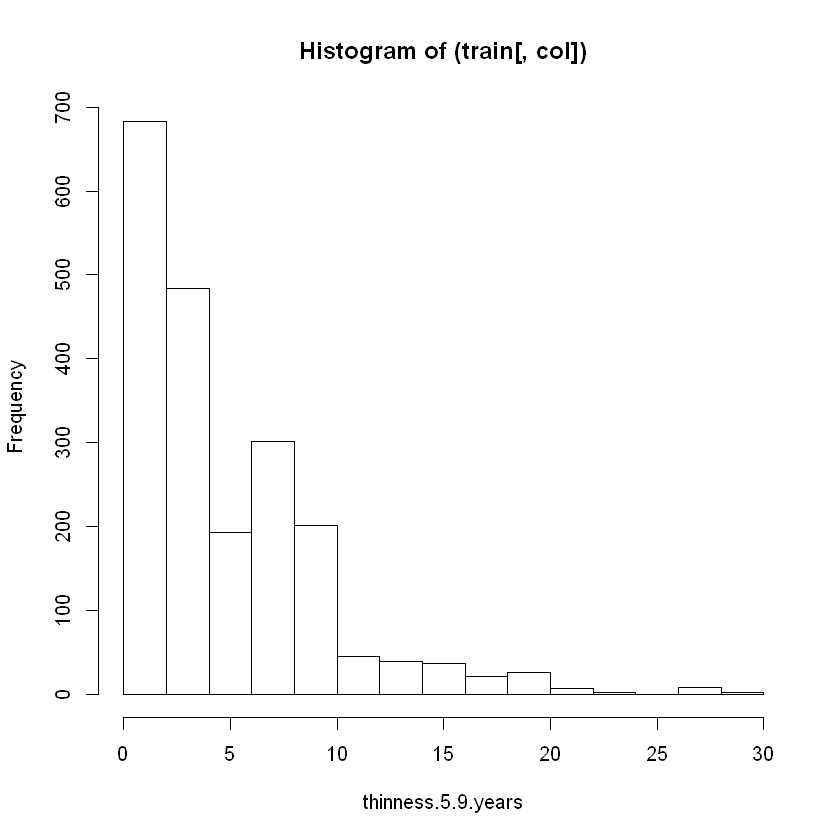

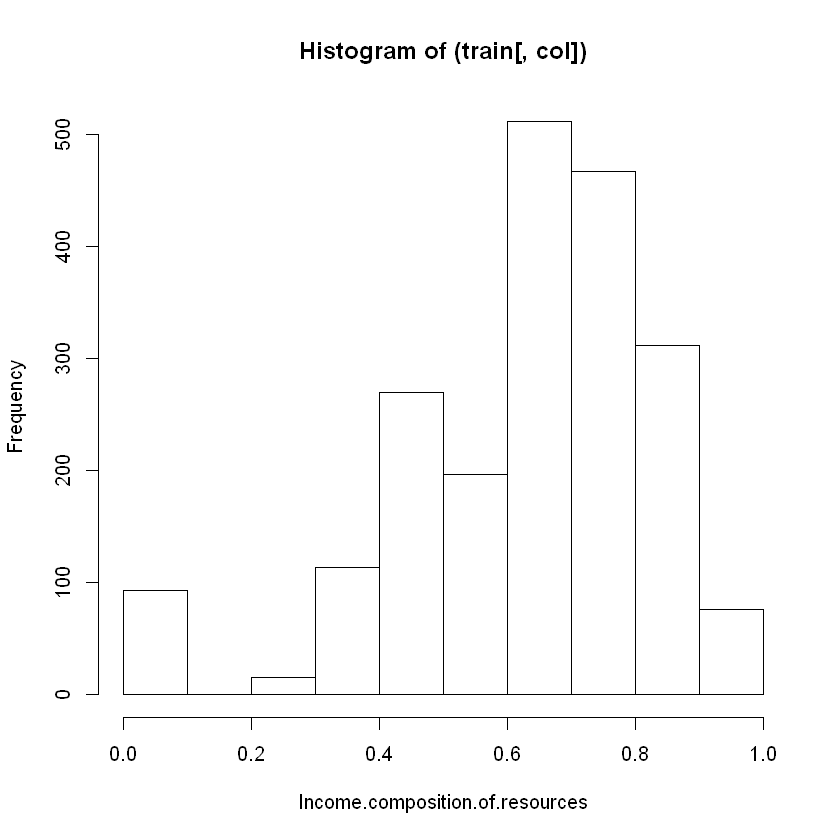

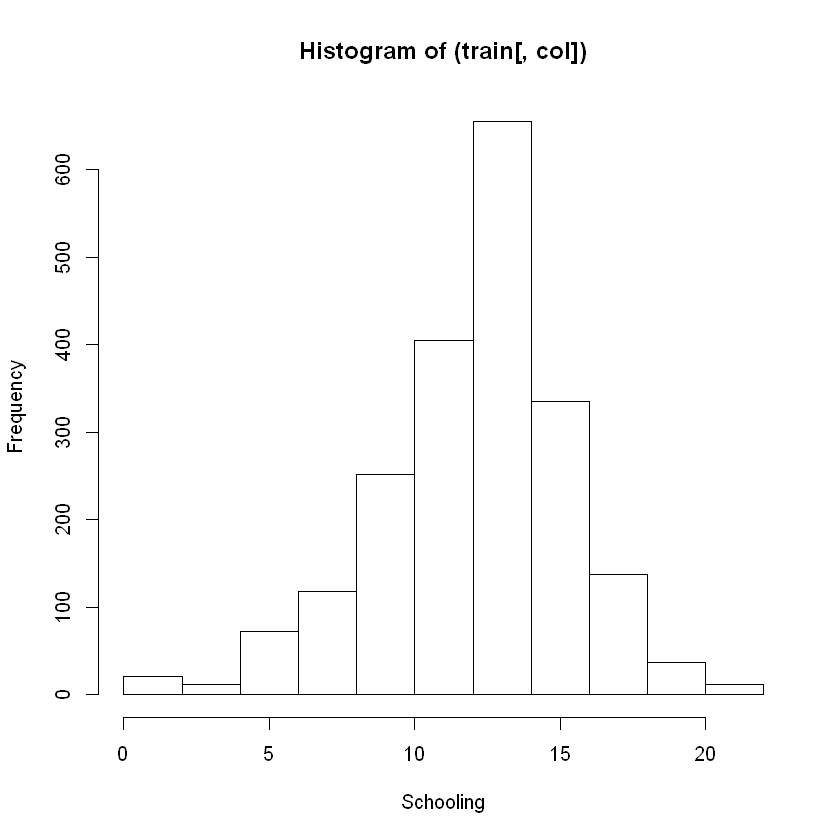

In [73]:
 for (col in 1:19) {
    hist((train[,col]),xlab= colnames(train[col]))
 }

In [74]:
model3 = lm(Life.expectancy~.,data = train3)

In [75]:
summary(model3)


Call:
lm(formula = Life.expectancy ~ ., data = train3)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.3304 -0.8948 -0.2372  0.5300 11.1463 

Coefficients: (6 not defined because of singularities)
                                                                 Estimate
(Intercept)                                                    -4.513e+02
Adult.Mortality                                                -9.612e-04
infant.deaths                                                  -2.782e-03
Alcohol                                                        -6.773e-02
percentage.expenditure                                          1.084e-01
Hepatitis.B                                                    -7.054e-02
Measles                                                        -6.324e-02
BMI                                                            -1.964e-02
under.five.deaths                                              -9.097e-01
Polio                                                 

[1] "RESIDUALS OF model3, model2, and model1 in descending order"


Warning message in predict.lm(model3, test3):
"prediction from a rank-deficient fit may be misleading"

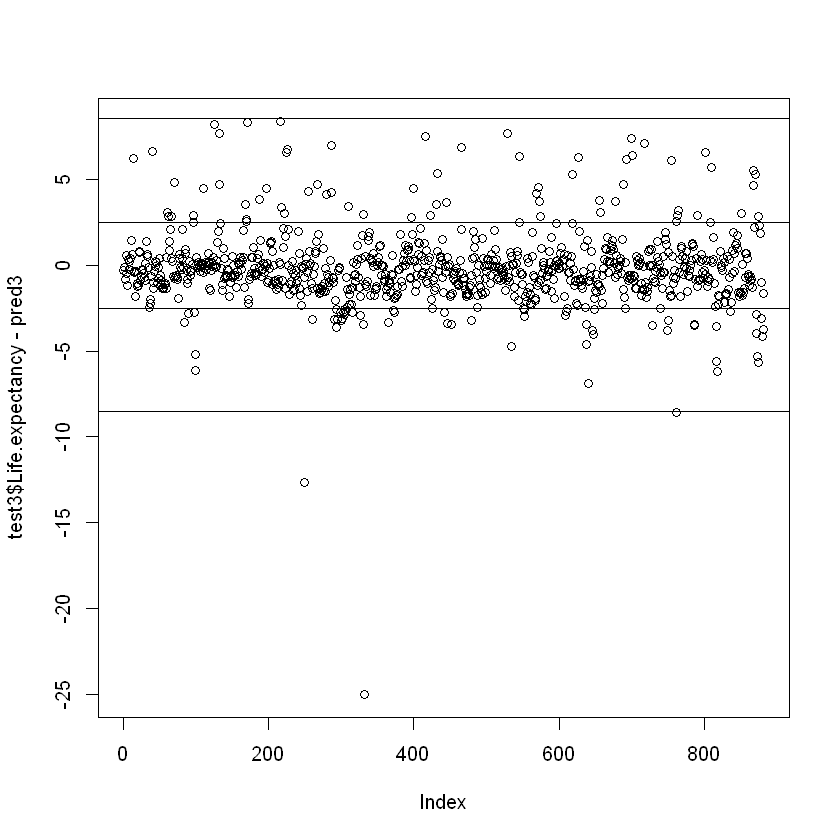

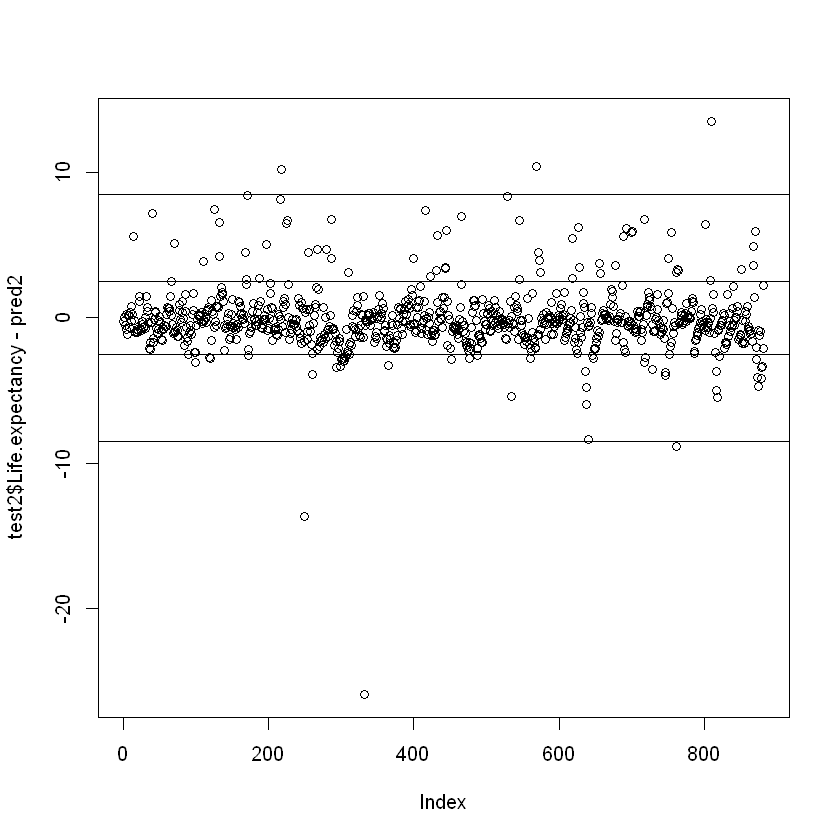

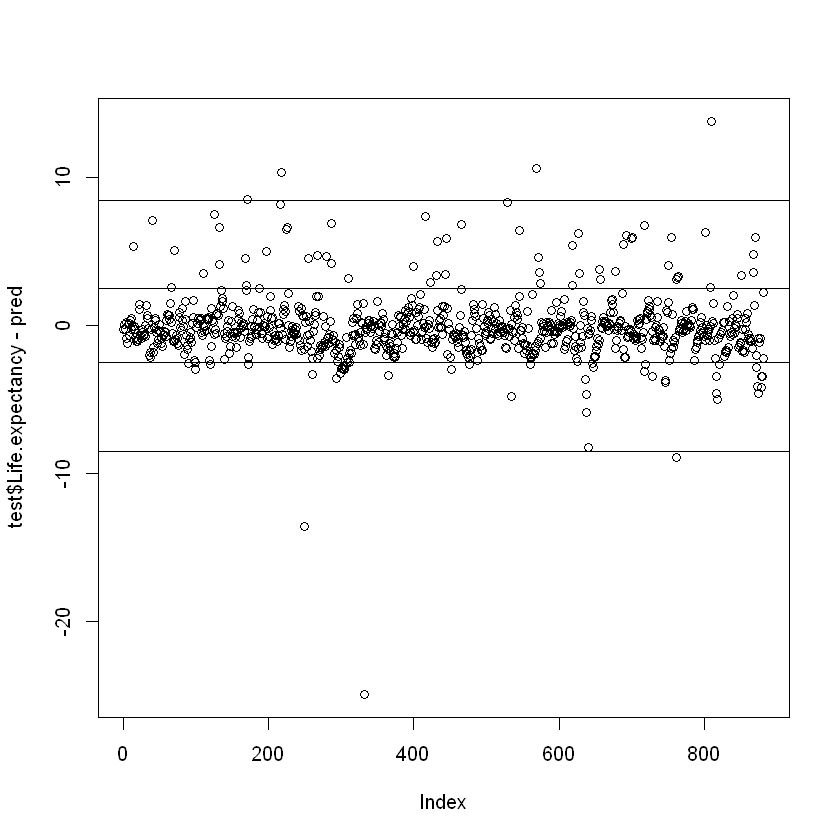

In [76]:
print("RESIDUALS OF model3, model2, and model1 in descending order")

pred3 = predict(model3,test3)
plot(test3$Life.expectancy-pred3)
abline(h = 2.5)
abline(h = -2.5)
abline(h = 8.5)
abline(h = -8.5)




plot(test2$Life.expectancy-pred2)
abline(h = 2.5)
abline(h = -2.5)
abline(h = 8.5)
abline(h = -8.5)




plot(test$Life.expectancy-pred)
abline(h = 2.5)
abline(h = -2.5)
abline(h = 8.5)
abline(h = -8.5)

In [77]:
sse(pred3,test3$Life.expectancy)

[1] 4139.881

### Model3 did get rid of a lot of the outliers. Lets drop those same features to see how
### This can help our model

In [78]:
train4 = subset(train3,select = -c(infant.deaths,percentage.expenditure,Population,thinness..1.19.years))

test4 = subset(test3,select = -c(infant.deaths,percentage.expenditure,Population,thinness..1.19.years))

In [79]:
model4 = lm(Life.expectancy~.,data = train4)
summary(model4)


Call:
lm(formula = Life.expectancy ~ ., data = train4)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.7970 -0.8915 -0.2176  0.5350 11.0967 

Coefficients: (6 not defined because of singularities)
                                                                 Estimate
(Intercept)                                                    -4.273e+02
Adult.Mortality                                                -1.004e-03
Alcohol                                                        -5.074e-02
Hepatitis.B                                                    -7.547e-02
Measles                                                        -6.361e-02
BMI                                                            -2.370e-02
under.five.deaths                                              -9.258e-01
Polio                                                           2.780e-02
Total.expenditure                                              -2.311e-01
Diphtheria                                            

Warning message in predict.lm(model4, test4):
"prediction from a rank-deficient fit may be misleading"

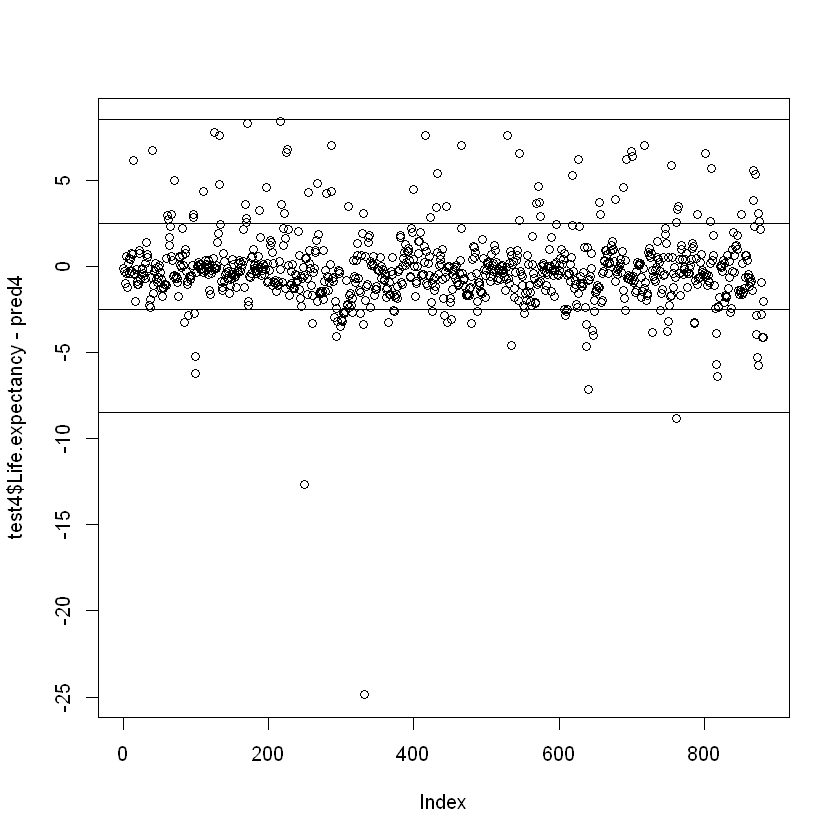

In [80]:
pred4 = predict(model4,test4)
plot(test4$Life.expectancy-pred4)
abline(h = 2.5)
abline(h = -2.5)
abline(h = 8.5)
abline(h = -8.5)

In [81]:
sse(test4$Life.expectancy,pred4)

[1] 4151.515

### Model 4 is similar to model 1, 2, and 3 in terms of residuals. Additonally, model4 has many of its features dropped, reducing the complexity of the data. The most important part comes from the SSE computation.

### Compared to model 3, which has a log transformation, our fourth model has a SSE cost that is 10 more errors than our third model's cost. Model 4 does have its dimensions reduced and the SSE is lower than model 1 and model 2 due to the log transformation.

BEST PREPROCESSING TECHNIQUES:

* Hot encoded country Status and Country variables

* Log transformed data with absolute skewness of 1.5 or greater 

* Variables Population, percentage.expenditure, and infant.deaths dropped.



R - Squared score for model 4: .96

Adjusted R - Squared being: .95


Model 1 Cost: 4229.35720137314

Model 2 Cost: 4350.88693029364


Model 3 Cost: 4149.22780828914


model 4 Cost: 4161.50708753186


#### 5: Dropping features that are not correlated to life expectancy



Earlier, we dropped features who were multicorrelated. Using train4 and test4, lets see what features we can drop

In [97]:
myMat = as.matrix(cor(train4[1:15]))

In [98]:
abs(myMat) > .4

,Life.expectancy,Adult.Mortality,Alcohol,Hepatitis.B,Measles,BMI,under.five.deaths,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,thinness.5.9.years,Income.composition.of.resources,Schooling
Life.expectancy,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE
Adult.Mortality,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
Alcohol,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE
Hepatitis.B,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
Measles,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
BMI,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE
under.five.deaths,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE
Polio,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
Total.expenditure,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
Diphtheria,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE


In [99]:
train5 = subset(train4,select = -c(Hepatitis.B,Measles,Polio,Total.expenditure,Diphtheria))

test5 = subset(test4,select = -c(Hepatitis.B,Measles,Polio,Total.expenditure,Diphtheria))

In [100]:
model5 = lm(Life.expectancy~.,data = train5)

In [101]:
summary(model5)


Call:
lm(formula = Life.expectancy ~ ., data = train5)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5371 -0.8998 -0.2186  0.5116 11.5208 

Coefficients: (6 not defined because of singularities)
                                                                 Estimate
(Intercept)                                                    -4.397e+02
Adult.Mortality                                                -9.567e-04
Alcohol                                                        -4.490e-02
BMI                                                            -4.141e-02
under.five.deaths                                              -9.523e-01
HIV.AIDS                                                       -2.145e+00
GDP                                                            -3.409e-02
thinness.5.9.years                                              1.110e-02
Income.composition.of.resources                                 2.198e-01
Schooling                                             

In [102]:
pred5 = predict(model5,test5)

Warning message in predict.lm(model5, test5):
"prediction from a rank-deficient fit may be misleading"

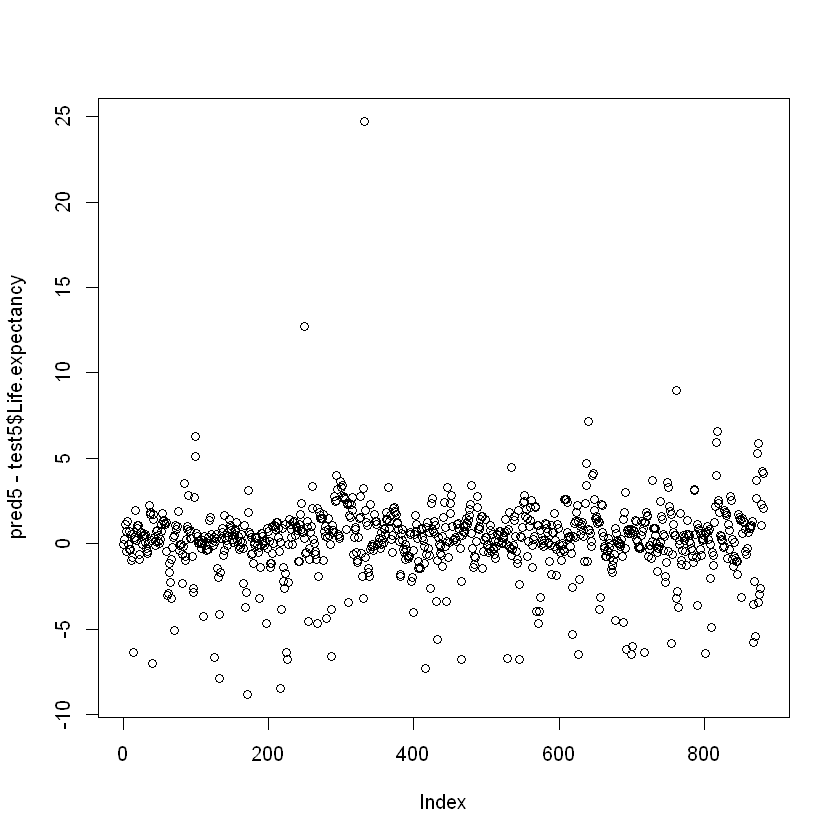

In [133]:
plot(pred5 - test5$Life.expectancy)

In [134]:
sse(pred5,test5$Life.expectancy)

[1] 4112.734

In [139]:
print(ncol(train5))
print(ncol(train))

[1] 206
[1] 215


In [ ]:
model5

#### Model 5 Evaluation:

* It appears that model 5's SSE is the lowest of them all. Additionally, there are way less features but we achieved an R-squared score of .96 still but the SSE for the residuals have gone down.

* Model 5 would be the best model



Model 1 Cost: 4229.35720137314

Model 2 Cost: 4350.88693029364

Model 3 Cost: 4149.22780828914

Mdel 4 Cost: 4161.50708753186

Model 5 Cost: 4112.73440374866


* Our final model, model 5, reduced the SSE cost by 6%. We were able to retain the same R^2 score and lowered the residuals after dropping about 9 columns from the original training set.